<a href="https://colab.research.google.com/github/florencianionquepan/analisis_hidratos_offshore/blob/main/An%C3%A1lisis_de_Hidratos_en_L%C3%ADnea_de_Producci%C3%B3n_Offshore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introducci√≥n

La formaci√≥n de hidratos en l√≠neas de producci√≥n offshore es un problema cr√≠tico en la industria del petr√≥leo y gas. Estas estructuras cristalinas pueden generar bloqueos en las tuber√≠as, afectando la continuidad operativa, aumentando costos de mantenimiento y representando riesgos para la seguridad. Los hidratos se forman bajo condiciones espec√≠ficas de presi√≥n y temperatura, por lo que su monitoreo y control son esenciales para evitar fallas en la producci√≥n.

Este proyecto analiza la formaci√≥n de hidratos en pozos petroleros utilizando el conjunto de datos 3W, que incluye instancias de eventos no deseados en pozos de petr√≥leo, como la formaci√≥n de hidratos. El dataset contiene informaci√≥n de pozos marinos con flujo natural (no requieren energia adicional), y mide diversas variables de proceso que se monitorizan com√∫nmente:

* Presi√≥n en el PDG
* Presi√≥n en el TPT
* Temperatura en el TPT
* Presi√≥n aguas arriba del PCK
* Temperatura aguas abajo del PCK

Siendo:
* PDG (Permanent Downhole Gauge): Sensor ubicado en el fondo del pozo que mide la presi√≥n.
* TPT (Temperature and Pressure Transducer): Es un dispositivo que contiene sensores de presi√≥n y temperatura, y es parte del √°rbol de navidad submarino
* PCK (Production Choke): Es una v√°lvula de control instalada al principio de la unidad de producci√≥n y es responsable del control del pozo en la superficie

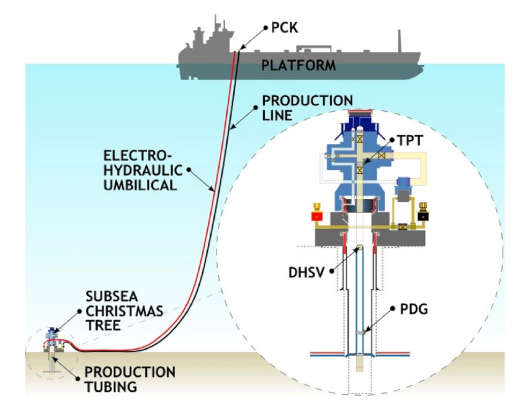


El an√°lisis se centrar√° en el evento indeseable n√∫mero 8, "Hidrato en la l√≠nea de producci√≥n". El conjunto de datos 3W incluye tanto datos reales como simulados, lo que proporciona una base rica para evaluar t√©cnicas de aprendizaje autom√°tico para la detecci√≥n temprana de fallos en ambientes hostiles.

En este trabajo, se analizar√°n y visualizar√°n las variables del dataset en histogramas para identificar outliers y se estudiar√°n los cambios a lo largo del tiempo. Los datos se etiquetan en tres periodos, seg√∫n el tipo de evento:

* Normal: No se detectan anomal√≠as.
* Faulty Transient (Transitorio Defectuoso): El evento est√° en curso y a√∫n no ha alcanzado su estado estable.
* Faulty Steady State (Estado Estable Defectuoso): El evento ya ha alcanzado un estado estable.
El etiquetado de los per√≠odos transitorios defectuosos es crucial para la clasificaci√≥n temprana de los eventos, ya que permite predecir la llegada del **Faulty Steady State**, proporcionando as√≠ una alerta temprana para prevenir fallos.

Este conjunto de datos fue presentado en el art√≠culo **Vargas et al. (2019)** y contiene instancias de ocho tipos de eventos indeseables caracterizados por ocho variables de proceso. El trabajo presenta tanto datos reales como simulados, lo que permite entrenar modelos para la detecci√≥n temprana de fallos y gestionar estos eventos en ambientes hostiles.

### Referencia:
Vargas, R. E., Munaro, C. J., Ciarelli, P. M., Medeiros, A. G., Amaral, B. G., Barrionuevo, D. C., Ara√∫jo, J. C. D., Ribeiro, J. L., Magalh√£es, L. P. (2019). A realistic and public dataset with rare undesirable real events in oil wells. *Journal of Petroleum Science and Engineering*, 181, 106223. [DOI: 10.1016/j.petrol.2019.106223](https://doi.org/10.1016/j.petrol.2019.106223).  
Enlace al art√≠culo completo: [ScienceDirect](http://www.sciencedirect.com/science/article/pii/S0920410519306357).



# Carga del Data set

Se cargan los datos en archivos CSV para trabajar en principio con este formato. Actualmente, el repositorio de Petrobras muestra estos datos en archivos Parquet.

Los archivos Parquet son un formato de almacenamiento optimizado para Big Data, dise√±ado para ser eficiente en almacenamiento y lectura. Su estructura columnar permite una mejor compresi√≥n y acceso m√°s r√°pido a los datos en comparaci√≥n con formatos como CSV o JSON, adem√°s de ser compatible con herramientas como Apache Spark, Hadoop y Pandas.

Sin embargo, en este trabajo, se utilizan archivos CSV para simplificar el procesamiento y manipulaci√≥n de datos, ya que es un formato m√°s accesible y f√°cil de manejar sin requerir configuraciones avanzadas o herramientas adicionales.


Inicialmente se van a resetear las variables, luego desde el drive se descomprime el zip con la data:

In [24]:
%reset -f

In [25]:
!cp /content/drive/MyDrive/DataScience/Entrega1/8.zip /content/dataset.zip

In [26]:
!unzip -o /content/dataset.zip -d /content/dataset/


Archive:  /content/dataset.zip
  inflating: /content/dataset/8/SIMULATED_00001.csv  
  inflating: /content/dataset/8/SIMULATED_00002.csv  
  inflating: /content/dataset/8/SIMULATED_00003.csv  
  inflating: /content/dataset/8/SIMULATED_00004.csv  
  inflating: /content/dataset/8/SIMULATED_00005.csv  
  inflating: /content/dataset/8/SIMULATED_00006.csv  
  inflating: /content/dataset/8/SIMULATED_00007.csv  
  inflating: /content/dataset/8/SIMULATED_00008.csv  
  inflating: /content/dataset/8/SIMULATED_00009.csv  
  inflating: /content/dataset/8/SIMULATED_00010.csv  
  inflating: /content/dataset/8/SIMULATED_00011.csv  
  inflating: /content/dataset/8/SIMULATED_00012.csv  
  inflating: /content/dataset/8/SIMULATED_00013.csv  
  inflating: /content/dataset/8/SIMULATED_00014.csv  
  inflating: /content/dataset/8/SIMULATED_00015.csv  
  inflating: /content/dataset/8/SIMULATED_00016.csv  
  inflating: /content/dataset/8/SIMULATED_00017.csv  
  inflating: /content/dataset/8/SIMULATED_00018.csv

Para familiarizarse con los datos a analizar, se cargar√°n todos los archivos CSV en dataframes. Seg√∫n la documentaci√≥n revisada, todos los CSV contienen las mismas columnas y, de acuerdo con las reglas establecidas, deben ser considerados en conjunto para un an√°lisis adecuado. En esta etapa, se verificar√° que todos los archivos mantengan la misma estructura y se describir√° el significado de cada columna.

In [27]:
import pandas as pd
import os
import re

data_path='/content/dataset/8'

dfs = {}  # Diccionario para almacenar los DataFrames

# Obtener todos los archivos CSV en la carpeta
files = [file for file in os.listdir(data_path) if file.endswith(".csv")]

# Separar los archivos en listas distintas
simulated_files = sorted(
    [file for file in files if file.startswith("SIMULATED")],
    key=lambda x: int(re.search(r'\d+', x).group())  # Extraer n√∫mero y ordenar
)

well_files = sorted(
    [file for file in files if file.startswith("WELL") or file.startswith("WEL")],
    key=lambda x: int(re.search(r'\d+', x).group())  # Extraer n√∫mero y ordenar
)

# Unir las listas con SIMULATED primero y WELL despu√©s
sorted_files = simulated_files + well_files

# Cargar los archivos en el diccionario ordenado
for file in sorted_files:
    file_path = os.path.join(data_path, file)
    df = pd.read_csv(file_path)
    dfs[file] = df  # Guardar el DataFrame con su nombre de archivo

print(f"Se cargaron {len(dfs)} archivos CSV.")

# Verificar el primer y √∫ltimo archivo en el diccionario
first_file = next(iter(dfs))
last_file = list(dfs.keys())[-1]

print(f"\nüìÇ Primer archivo en el diccionario: {first_file}")
print(f"üìÇ √öltimo archivo en el diccionario: {last_file}")

for file, df in dfs.items():
    print(f"\nüìÇ Archivo: {file}")
    print(df.columns.tolist())  # Lista de nombres de columnas
    print(df.dtypes)  # Verifica el tipo de datos de cada columna

Se cargaron 84 archivos CSV.

üìÇ Primer archivo en el diccionario: SIMULATED_00001.csv
üìÇ √öltimo archivo en el diccionario: WELL-00021_20170509013517.csv

üìÇ Archivo: SIMULATED_00001.csv
['timestamp', 'P-PDG', 'P-TPT', 'T-TPT', 'P-MON-CKP', 'T-JUS-CKP', 'P-JUS-CKGL', 'T-JUS-CKGL', 'QGL', 'class']
timestamp      object
P-PDG         float64
P-TPT         float64
T-TPT         float64
P-MON-CKP     float64
T-JUS-CKP     float64
P-JUS-CKGL    float64
T-JUS-CKGL    float64
QGL           float64
class           int64
dtype: object

üìÇ Archivo: SIMULATED_00002.csv
['timestamp', 'P-PDG', 'P-TPT', 'T-TPT', 'P-MON-CKP', 'T-JUS-CKP', 'P-JUS-CKGL', 'T-JUS-CKGL', 'QGL', 'class']
timestamp      object
P-PDG         float64
P-TPT         float64
T-TPT         float64
P-MON-CKP     float64
T-JUS-CKP     float64
P-JUS-CKGL    float64
T-JUS-CKGL    float64
QGL           float64
class           int64
dtype: object

üìÇ Archivo: SIMULATED_00003.csv
['timestamp', 'P-PDG', 'P-TPT', 'T-TPT', 'P-MO

Como se puede ver, todos los csvs contienen los mismos nombres de columnas:


1. timestamp: Marca de tiempo que indica el momento exacto en que se registr√≥ cada medici√≥n. Est√° en formato "AAAA-MM-DD HH:MM:SS.ssssss" (a√±o-mes-d√≠a hora:minuto:segundo.milisegundos), lo que permite un an√°lisis temporal preciso de los datos
2. P-PDG: Presi√≥n del fluido en el PDG [Pa]
3. P-TPT: Presi√≥n del fluido en el TPT [Pa]
4. T-TPT:  Temperatura del fluido en el TPT [C]
5. P-MON-CKP: Presi√≥n del fluido antes de la v√°lvula PCK, o lo que es lo mismo, presi√≥n aguas arriba de la v√°lvula PCK [Pa]
6. T-JUS-CKP: Temperatura del fluido despu√©s de la v√°lvula o aguas abajo del PCK [C]
7. P-JUS-CKGL: Presi√≥n del fluido despu√©s de la v√°lvula de control de gas lift [Pa]
8. T-JUS-CKGL:  Temperatura del fluido despu√©s de la v√°lvula de control de gas lift [C]
9. QGL: Caudal de gas lift [sm3/s]
10. class: Etiqueta que indica el estado del sistema en cada registro. Puede tomar diferentes valores, 0: Estado normal, sin anomalias. 3 y 103: eventos anomales detectados. De todas maneras, no se encontro aun ninguna referencia a estos codigos especificos.



# Exploraci√≥n y visualizaci√≥n (EDA): conociendo el data set

Dado que se cuenta con las mismas columnas en todos los archivos, se exploraran algunas filas y dimensiones de un archivo en especifico:

In [28]:
# Obtener la primera clave del diccionario (que es el nombre del archivo)
first_file = next(iter(dfs))

# Acceder al DataFrame correspondiente a ese archivo
df_1 = dfs[first_file]

print(f"\nüìÇ Primer archivo en el diccionario: {first_file}")

# Primeras filas
print("\nPrimeras filas:")
print(df_1.head())

# √öltimas filas
print("\n√öltimas filas:")
print(df_1.tail())

# Dimensiones del DataFrame
print("\nDimensiones (filas, columnas):")
print(df_1.shape)

# Informaci√≥n general sobre el DataFrame
print("\nInformaci√≥n general sobre el DataFrame:")
print(df_1.info())

# Columnas del DataFrame
print("\nColumnas del DataFrame:")
print(df_1.columns.tolist())


üìÇ Primer archivo en el diccionario: SIMULATED_00001.csv

Primeras filas:
                    timestamp       P-PDG       P-TPT  T-TPT  P-MON-CKP  \
0  2018-05-17 22:56:06.000000 27897490.00 19824230.00 125.69 4059666.00   
1  2018-05-17 22:56:07.000000 27897450.00 19824230.00 125.69 4059666.00   
2  2018-05-17 22:56:08.000000 27897360.00 19824230.00 125.69 4059666.00   
3  2018-05-17 22:56:09.000000 27897430.00 19824230.00 125.69 4059666.00   
4  2018-05-17 22:56:10.000000 27897500.00 19824230.00 125.69 4059666.00   

   T-JUS-CKP  P-JUS-CKGL  T-JUS-CKGL  QGL  class  
0      97.55         NaN         NaN  NaN      0  
1      97.55         NaN         NaN  NaN      0  
2      97.55         NaN         NaN  NaN      0  
3      97.55         NaN         NaN  NaN      0  
4      97.55         NaN         NaN  NaN      0  

√öltimas filas:
                        timestamp       P-PDG       P-TPT  T-TPT  P-MON-CKP  \
26994  2018-05-18 06:26:00.000000 33700360.00 28074090.00   3.41 40027

Las columnas P-JUS-CKGL, T-JUS-CKGL y QGL est√°n asociadas al sistema de gas lift, el cual no est√° presente en los conjuntos de datos analizados (todas sus entradas son NaN). Adem√°s, el gas lift no tiene un impacto directo en la formaci√≥n de hidratos, ya que este fen√≥meno est√° determinado principalmente por las condiciones de presi√≥n y temperatura en el fondo del pozo, as√≠ como por la ca√≠da de presi√≥n en el PCK. Dado que estas variables no aportan informaci√≥n relevante para este an√°lisis y su presencia solo introducir√≠a datos faltantes, se justifica su eliminaci√≥n del estudio.

In [29]:
for file, df in dfs.items():
    # Borrar las columnas relacionadas con gas lift
    columns_to_drop = ['P-JUS-CKGL', 'T-JUS-CKGL', 'QGL']
    df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

## Analisis de medidas estadisticas

A continuacion se visualizaran las principales medidas estadisticas de cada archivo.

In [30]:
pd.set_option('display.float_format', '{:.2f}'.format) # Para ver numeros sin notacion cientifica y ver valores mas claros

for file in sorted(dfs.keys()):
    df = dfs[file]
    print(f"\nüìÇ Archivo: {file}")
    # Convertir la columna 'class' a string
    if 'class' in df.columns:
        df['class'] = df['class'].astype(str)

    # Convertir a MPa si las columnas existen
    if "P-PDG" in df.columns:
        df["P-PDG (MPa)"] = df["P-PDG"] / 1e6  # Convertir a MPa
    if "P-TPT" in df.columns:
        df["P-TPT (MPa)"] = df["P-TPT"] / 1e6  # Convertir a MPa
    if "P-MON-CKP" in df.columns:
        df["P-MON-CKP (MPa)"] = df["P-MON-CKP"] / 1e6  # Convertir a MPa

    print(df["T-JUS-CKP"].isna().sum())  # Muestra cu√°ntos NaN hay en la columna de T-JUS-CKP

    # Definir el orden deseado de columnas a mostrar
    columnas_a_mostrar = ["T-TPT", "P-TPT (MPa)", "P-MON-CKP (MPa)", "T-JUS-CKP", "P-PDG (MPa)"]

    # Filtrar y reordenar solo las columnas disponibles
    columnas_presentes = [col for col in columnas_a_mostrar if col in df.columns]

    # Mostrar estad√≠sticas solo de estas columnas
    print(df.loc[:, columnas_presentes].describe())


üìÇ Archivo: SIMULATED_00001.csv
0
         T-TPT  P-TPT (MPa)  P-MON-CKP (MPa)  T-JUS-CKP  P-PDG (MPa)
count 26999.00     26999.00         26999.00   26999.00     26999.00
mean     21.26        26.98             4.01      50.28        32.96
std      41.87         2.69             0.02      24.78         1.89
min       3.12        19.82             4.00      27.83        27.90
25%       3.41        27.71             4.00      32.45        33.66
50%       3.42        28.10             4.00      36.63        33.70
75%       3.55        28.16             4.00      63.98        33.70
max     126.16        28.21             4.06      97.55        33.74

üìÇ Archivo: SIMULATED_00002.csv
0
         T-TPT  P-TPT (MPa)  P-MON-CKP (MPa)  T-JUS-CKP  P-PDG (MPa)
count 26999.00     26999.00         26999.00   26999.00     26999.00
mean     21.09        27.29             4.01      47.69        32.99
std      41.47         2.62             0.02      22.14         1.91
min       3.21        20.26  

Se estudiar√°n entonces las siguientes variables: T-TPT, P-TPT, P-MON-PCK, T-JUS-PCK y P-PDG.

### An√°lisis de los datos simulados

En los archivos de datos simulados, espec√≠ficamente en el primer archivo, se observa lo siguiente:

T-TPT: La media y la mediana presentan una diferencia significativa, lo que sugiere una distribuci√≥n asim√©trica. La media es de 21.26¬∞C y la mediana de 3.42¬∞C. Dado que la media es mayor que la mediana, esto indica una asimetr√≠a positiva, es decir, una cola larga a la derecha, lo que sugiere que existen valores muy altos que est√°n elevando la media.

P-TPT: En este caso, la media y la mediana son muy similares, con valores de 26.98 MPa y 28.10 MPa, respectivamente, lo que indica una distribuci√≥n sim√©trica.

P-MON-PCK (presi√≥n aguas arriba del PCK): La media es de 4.01 MPa y la mediana de 4 MPa, lo que tambi√©n sugiere una distribuci√≥n sim√©trica.

T-JUS-CKP (temperatura aguas abajo del PCK): La media es de 50¬∞C y la mediana de 36.63¬∞C, lo que indica una distribuci√≥n asim√©trica y que existen valores muy altos que est√°n elevando la media.

P-PDG (presi√≥n en el man√≥metro): La media es de 32.96 MPa y la mediana de 33.70 MPa, mostrando valores muy similares entre s√≠, lo que refleja una distribuci√≥n sim√©trica.

En este contexto, tiene sentido que la desviaci√≥n est√°ndar sea m√°s alta en las mediciones de temperatura (debido a la asimetr√≠a y los valores extremos) y m√°s baja en las mediciones de presi√≥n (que presentan distribuciones m√°s sim√©tricas).

Para el resto de los archivos CSV de tipo simulados, los valores tienden a mantenerse consistentes con los observados en el primer archivo.

A continuaci√≥n, se mostrar√°n los histogramas de estas mismas variables para verificar si las conclusiones obtenidas son correctas. En un primer intento, se utiliz√≥ la regla de la ra√≠z cuadrada para determinar el n√∫mero de intervalos (lo que dio como resultado 164 intervalos, equivalente a la ra√≠z cuadrada de las 26,999 observaciones), pero los valores de algunas variables aparecian muy concentrados solamente en algunos intervalos.


Luego se decidio obtener el numero de intervalos con la Regla de Scott que es mas apropiada para variables que presentan valores atipicos, ya que con una frecuencia fija se veian muchos valores en los extremos. La Regla de Scott sugiere que el ancho de cada intervalo debe ser igual a 3.5 veces la desviaci√≥n est√°ndar dividido por la ra√≠z cuadrada del n√∫mero de observaciones.
Inmediatamente debajo se visualizaran tambien los graficos de caja boxplot.

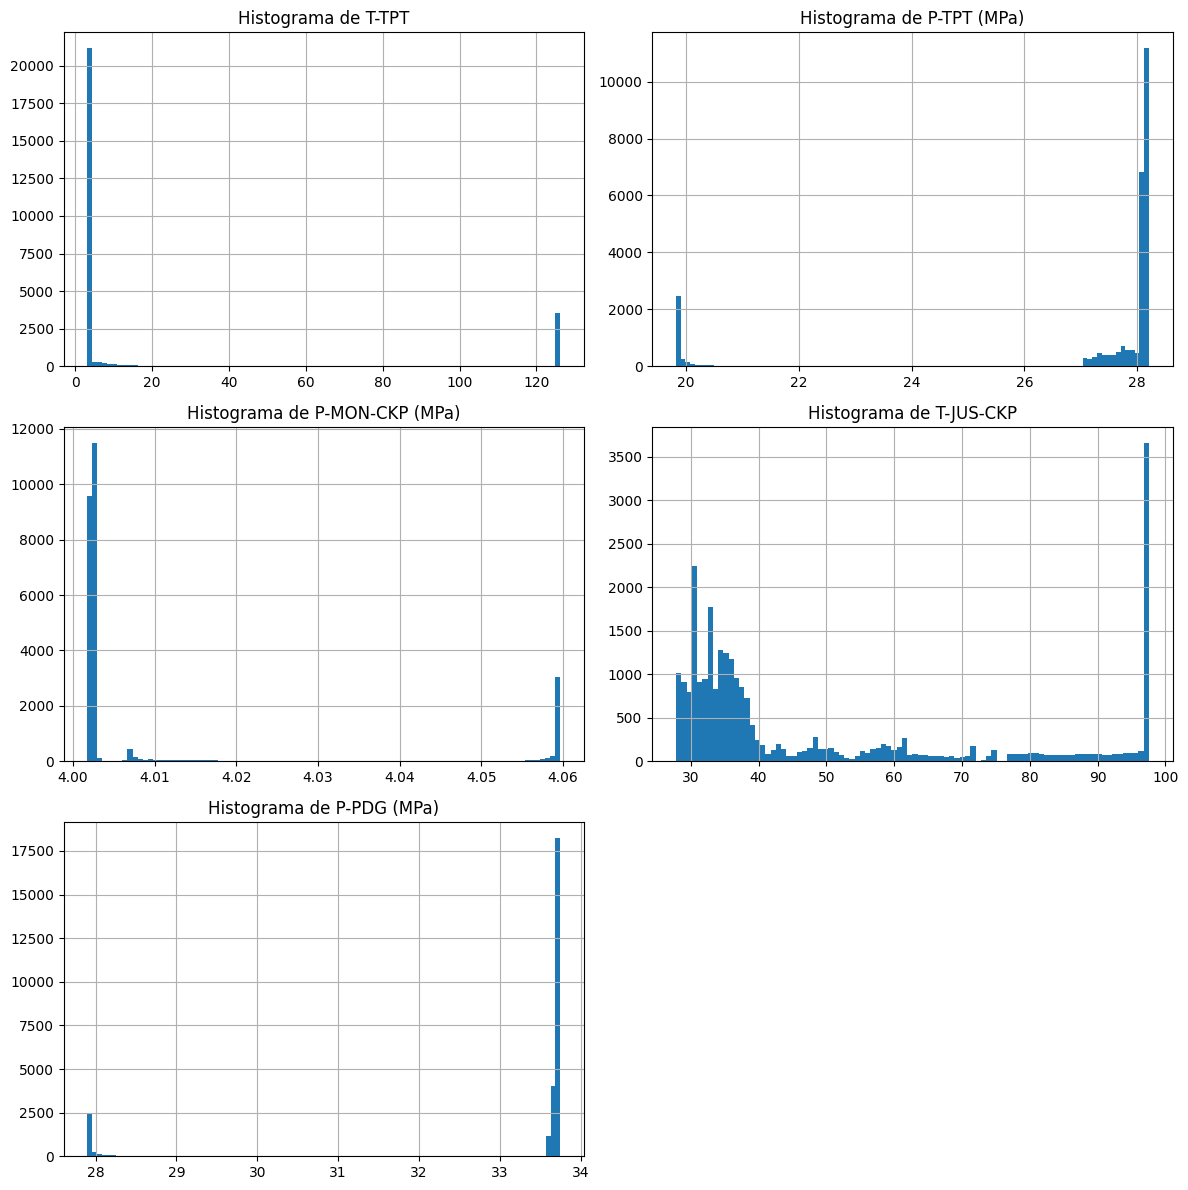

In [31]:
import matplotlib.pyplot as plt
import numpy as np

file_simulated_1='SIMULATED_00001.csv'
df_simulated_1=dfs[file_simulated_1]
n=12699

variables = ["T-TPT", "P-TPT (MPa)", "P-MON-CKP (MPa)", "T-JUS-CKP", "P-PDG (MPa)"]

intervalos_scott = {}

# Calcular el intervalo de Scott para cada variable
for var in variables:
    std = df_simulated_1[var].std()  # Desviaci√≥n est√°ndar de la variable
    intervalo_scott = (3.5 * std) / np.sqrt(n)
    intervalos_scott[var] = intervalo_scott

# Graficar los histogramas
plt.figure(figsize=(12, 12))

for i, var in enumerate(variables, 1):
    plt.subplot(3, 2, i)  # Distribuir los gr√°ficos en una cuadr√≠cula 3x2
    intervalo_scott = intervalos_scott[var]  # Obtener el intervalo de Scott para la variable
    bins = int((df_simulated_1[var].max() - df_simulated_1[var].min()) / intervalo_scott)  # Calcular el n√∫mero de bins
    df_simulated_1[var].hist(bins=bins)
    plt.title(f'Histograma de {var}')

plt.tight_layout()  # Ajustar autom√°ticamente los espacios entre gr√°ficos
plt.show()

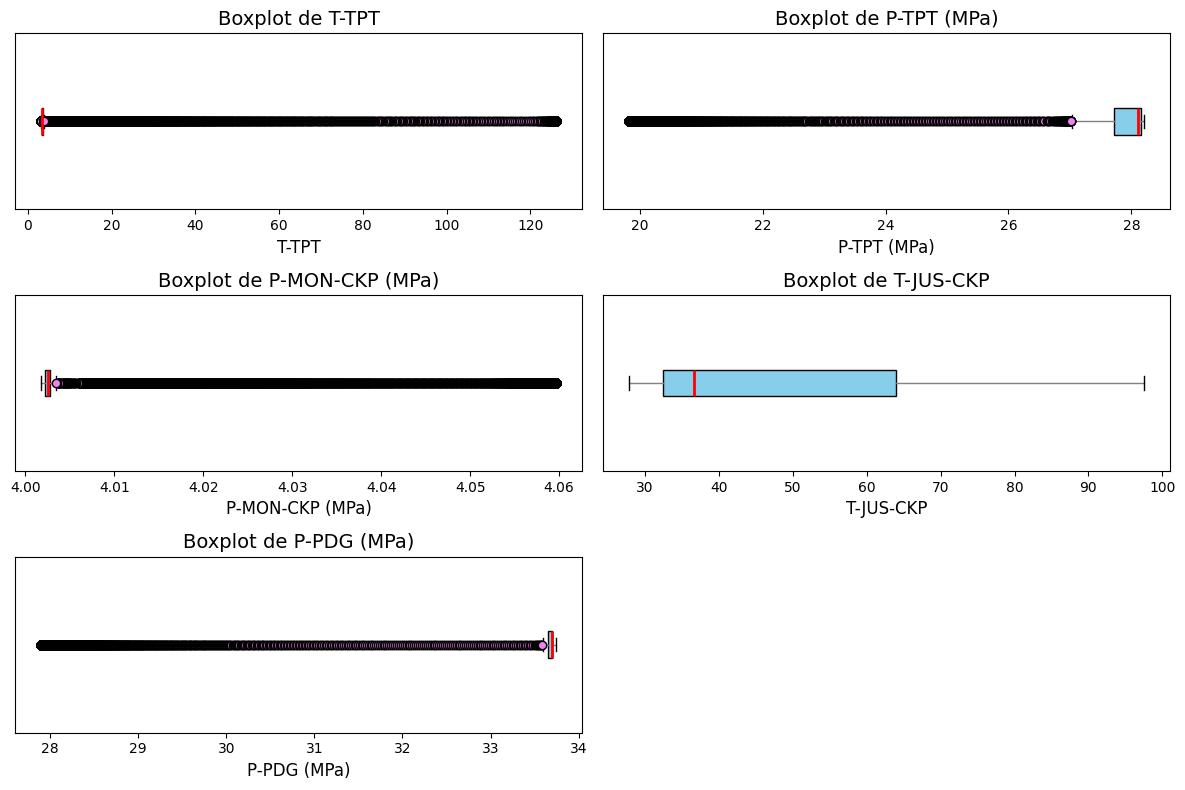

In [32]:
# Graficar los boxplots
plt.figure(figsize=(12, 8))

# Definir propiedades para los outliers (m√°s personalizable)
flierprops = dict(marker='o', markerfacecolor='violet', markersize=6, linestyle='none', markeredgecolor='black')
for i, var in enumerate(variables, 1):
    plt.subplot(3, 2, i)
    boxplot_parts = plt.boxplot(df_simulated_1[var], vert=False, flierprops=flierprops, patch_artist=True)

    # boxprops para el color de la caja
    boxplot_parts['boxes'][0].set(facecolor='skyblue', edgecolor='black')  # Color de la caja y borde

    # whiskerprops para el color de los "bigotes"
    for whisker in boxplot_parts['whiskers']:
        whisker.set(color='gray')

    # medianprops para el color y grosor de la mediana
    for median in boxplot_parts['medians']:
        median.set(color='red', linewidth=2)

    plt.title(f'Boxplot de {var}', fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.yticks([])

plt.tight_layout()
plt.show()

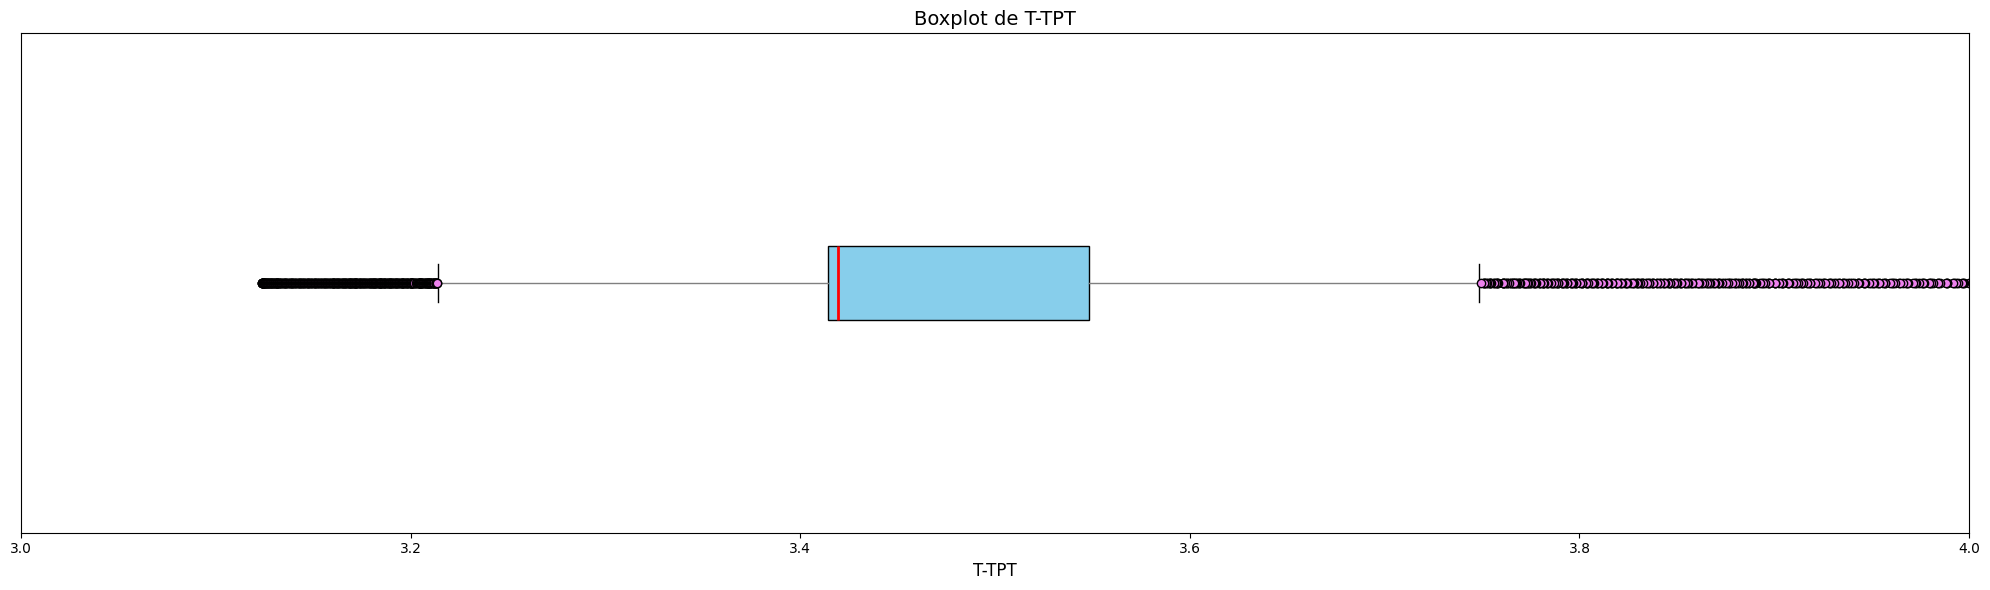

In [33]:
# Grafico de nuevo el boxplot de T-TPT con otro tama√±o y cortando los outliers porque debo visualizar la caja
plt.figure(figsize=(20, 6))  # Ajustar tama√±o de la figura si es necesario

# Definir propiedades para los outliers
flierprops = dict(marker='o', markerfacecolor='violet', markersize=6, linestyle='none', markeredgecolor='black')

boxplot_parts = plt.boxplot(df_simulated_1['T-TPT'], vert=False, flierprops=flierprops, patch_artist=True)

# Estilos para la caja, bigotes y mediana (como antes)
boxplot_parts['boxes'][0].set(facecolor='skyblue', edgecolor='black')
for whisker in boxplot_parts['whiskers']:
    whisker.set(color='gray')
for median in boxplot_parts['medians']:
    median.set(color='red', linewidth=2)

plt.title('Boxplot de T-TPT', fontsize=14)
plt.xlabel('T-TPT', fontsize=12)
plt.yticks([])  # Ocultar ticks del eje Y

# Ajustar la escala horizontal (eje X)
plt.xlim(3, 4)  # Ajusta los l√≠mites seg√∫n tus datos

plt.tight_layout()
plt.show()

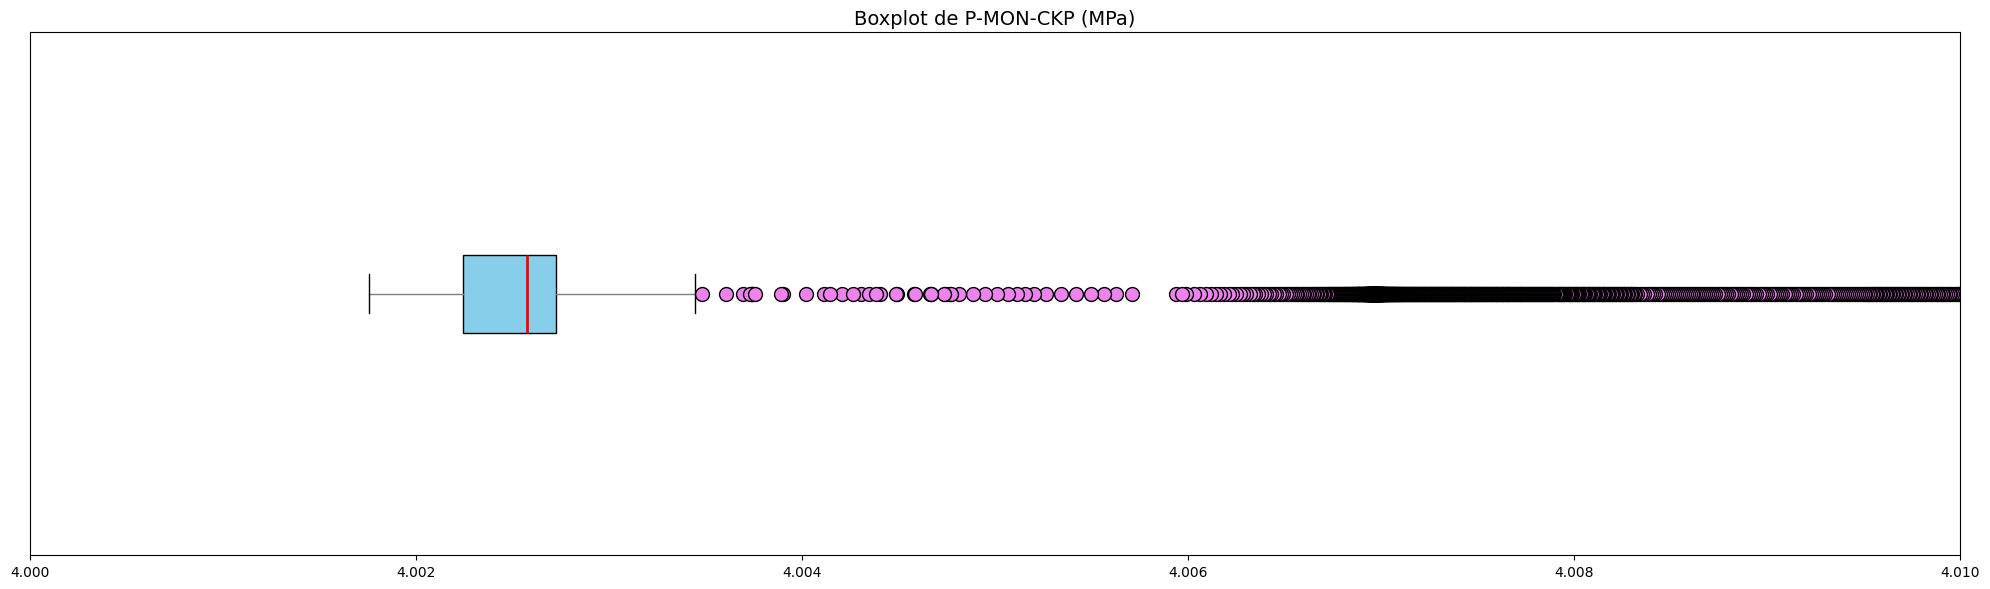

In [34]:
# Grafico de nuevo el boxplot de P-MON-CKP con otro tama√±o y cortando los outliers porque debo visualizar la caja
plt.figure(figsize=(20, 6))  # Ajustar tama√±o de la figura si es necesario

# Definir propiedades para los outliers
flierprops = dict(marker='o', markerfacecolor='violet', markersize=10, linestyle='none', markeredgecolor='black')

boxplot_parts = plt.boxplot(df_simulated_1['P-MON-CKP (MPa)'], vert=False, flierprops=flierprops, patch_artist=True)

# Estilos para la caja, bigotes y mediana (como antes)
boxplot_parts['boxes'][0].set(facecolor='skyblue', edgecolor='black')
for whisker in boxplot_parts['whiskers']:
    whisker.set(color='gray')
for median in boxplot_parts['medians']:
    median.set(color='red', linewidth=2)

plt.title('Boxplot de P-MON-CKP (MPa)', fontsize=14)
plt.yticks([])  # Ocultar ticks del eje Y

# Ajustar la escala horizontal (eje X)
plt.xlim(4, 4.01)  # Ajusta los l√≠mites seg√∫n tus datos

plt.tight_layout()
plt.show()

En cuanto a la variable **T-TPT**, el **histograma** sugiere que los valores se concentran m√°s en los extremos que en el centro, con una mayor frecuencia de temperaturas bajas en comparaci√≥n con las altas. Este patr√≥n es consistente con la asimetr√≠a positiva previamente indicada por la media mayor a la mediana (cola larga a la derecha). Es decir, existen valores muy altos (outliers o valores at√≠picos) que est√°n elevando la media. Aunque las temperaturas bajas son m√°s frecuentes, los valores extremos elevados, aunque pocos, son lo suficientemente grandes como para desplazar la media hacia valores m√°s altos, lo que refuerza la presencia de una asimetr√≠a positiva en la distribuci√≥n.
Al observar el **boxplot**, se pueden ver varios outliers de temperaturas altas. La caja se extiende desde aproximadamente 3.4 hasta 3.55, lo que indica que el 50% central de los datos de T-TPT se encuentra en este rango. La l√≠nea de la mediana est√° ligeramente m√°s cerca del borde inferior de la caja, lo que sugiere una asimetr√≠a hacia los valores m√°s altos. Adem√°s, varios puntos at√≠picos se encuentran por encima del bigote superior, lo que confirma la presencia de valores inusualmente altos en los datos.

El an√°lisis del **histograma de P-TPT** revela una distribuci√≥n peculiar, con una concentraci√≥n significativa de valores en los extremos. Se observan picos prominentes alrededor de 20 MPa y, especialmente, en 28 MPa.
El **boxplot** complementa esta visi√≥n mostrando una dispersi√≥n considerable de los datos, con una mediana ubicada cerca del tercer cuartil (Q3). La presencia de varios outliers por debajo del l√≠mite inferior sugiere la existencia de valores inusualmente bajos de P-TPT que podr√≠an merecer una investigaci√≥n m√°s profunda. La ausencia de outliers por encima del l√≠mite superior indica que no hay valores extremadamente altos que se desv√≠en significativamente del resto de la distribuci√≥n.

---

El **histograma de presion aguas arriba P-MON-PCK** revela una distribuci√≥n con una alta frecuencia de valores centrados en 4 y 4.06 MPa. Esta concentraci√≥n de valores sugiere una posible distribuci√≥n sim√©trica, aunque con una ligera asimetr√≠a positiva (cola hacia la derecha).
El **boxplot** complementa esta informaci√≥n mostrando una dispersi√≥n considerable de los datos, con una mediana ligeramente desplazada hacia el tercer cuartil (Q3). La presencia de varios outliers por encima del l√≠mite superior indica la existencia de valores inusualmente altos de P-MON-PCK que se desv√≠an significativamente del resto de la distribuci√≥n. Estos outliers podr√≠an brindar informaci√≥n relevante sobre el sistema en estudio por lo que no se van a descartar.


El **histograma de la temperatura aguas abajo (T-JUS-CKP)** revela una dispersi√≥n considerable de los datos. Si bien la media se sit√∫a en 50¬∞C y la mediana en 36.63¬∞C, esta diferencia sugiere una distribuci√≥n asim√©trica, con valores extremos que elevan la media. En efecto, se observan picos de temperatura significativamente altos, mientras que la mayor√≠a de los datos se concentran en valores m√°s bajos, entre 30 y 40¬∞C.
El **boxplot** confirma esta asimetr√≠a y dispersi√≥n, mostrando una distribuci√≥n donde no se identifican outliers. Esto implica que, si bien existen valores altos de temperatura, estos no se consideran at√≠picos seg√∫n el criterio del boxplot.

---

Los **valores de presi√≥n en el man√≥metro (P-PDG)** se concentran frecuentemente entre 33 y 34 MPa, lo que sugiere un rango t√≠pico de operaci√≥n del sistema. Sin embargo, se identifican algunos outliers en 28 MPa, lo que indica la presencia de eventos o condiciones inusuales que resultan en presiones m√°s bajas. Estos outliers podr√≠an indicar informaci√≥n relevante sobre el sistema en estudio.




### An√°lisis de los datos reales

En el archivo correspondiente al pozo WELL-00019, se observan las siguientes caracter√≠sticas:

T-JUS-CKP: En este caso, las medidas estad√≠sticas son todas NaN. Al verificar contra el archivo CSV original, se confirma que esta columna no contiene ning√∫n valor en dicho archivo.

Presiones: Para las dem√°s variables de presi√≥n, los valores resultan ser 0, ya que todos los registros en este archivo contienen 0 en esas columnas.

P-MON-CKP: Esta variable presenta una media de 1.40 MPa y una mediana de 1.18 MPa, con un valor m√°ximo de 3.15 MPa. Adem√°s, la desviaci√≥n est√°ndar es muy peque√±a, lo que sugiere una distribuci√≥n bastante estable. Este comportamiento se mantiene en los archivos de los otros dos pozos, WELL-00020 y WELL-00021, donde los datos de esta variable son consistentes y presentan medidas estad√≠sticas similares.

Para el pozo WELL-00020:

T-TPT: La media es de 21¬∞C, mientras que la mediana es de 14.97¬∞C, con una desviaci√≥n est√°ndar de 14¬∞C. Esto indica que podr√≠a tratarse de una distribuci√≥n asim√©trica.

P-TPT: La media es de 1378.7 MPa y la mediana de 1405.1 MPa. Dado que la media y la mediana son bastante similares, no parece haber una desviaci√≥n asim√©trica significativa en esta variable.

P-MON-CKP: La media es de 2.97 MPa y la mediana de 3.15 MPa, lo que indica una distribuci√≥n sim√©trica.

T-JUS-CKP: No se encuentran valores en este pozo.

P-PDG (presi√≥n en el man√≥metro): La media es de 2254 MPa y la mediana de 2262 MPa, con valores bastante cercanos, lo que sugiere una distribuci√≥n sim√©trica.

Una observaci√≥n importante es la diferencia entre las presiones reales y las de los datos simulados. Esto podr√≠a deberse a la naturaleza de los modelos de simulaci√≥n, que no siempre replican con precisi√≥n las condiciones reales del pozo. Es recomendable investigar este aspecto para comprender mejor las discrepancias.

Para el pozo WELL-00021:

T-TPT: La media es de 13¬∞C y la mediana de 16¬∞C, con una desviaci√≥n est√°ndar de 5.47¬∞C. Esto indica una distribuci√≥n con ligera asimetr√≠a, pero los valores no parecen estar excesivamente dispersos.

P-TPT: La media es de 1448 MPa y la mediana de 1648 MPa, lo que sugiere que podr√≠an existir outliers (valores extremos), ya que la diferencia entre la media y la mediana es considerable. El valor m√°ximo observado en esta columna es de 1979 MPa, lo que refuerza la hip√≥tesis de la presencia de valores at√≠picos.

P-MON-CKP: La media es de 1.42 MPa y la mediana de 1.33 MPa, lo que indica que los valores se mantienen cercanos, sugiriendo una distribuci√≥n sim√©trica.

T-JUS-CKP: No contiene valores en este pozo.

P-PDG: La media es de 3085 MPa y la mediana de 3084 MPa, lo que indica que esta variable no presenta fluctuaciones importantes en este pozo.

Conclusiones finales:

En los datos de los pozos WELL-00019 y WELL-00020, los valores de temperatura y presi√≥n parecen seguir patrones consistentes, aunque se observan algunas columnas con valores faltantes, como es el caso de T-JUS-CKP. Por otro lado, las presiones de los pozos reales, en particular P-TPT y P-MON-CKP, muestran una estabilidad que podr√≠a sugerir una distribuci√≥n sim√©trica en su mayor√≠a. Sin embargo, en el pozo WELL-00021, la presencia de outliers en P-TPT requiere una atenci√≥n especial, ya que estos valores at√≠picos podr√≠an influir en la interpretaci√≥n del comportamiento de las presiones.


---

Haremos uso de los histogramas para vsualizar la informacion real de los pozos WELL-00020 y WEL-00021 y en este caso se analizaran de forma mas resumida los datos. Luego se proceder√° con la evaluaci√≥n mediante boxplots para identificar los outliers en caso de ser necesario. Este an√°lisis no tiene como objetivo eliminar ni descartar los datos, sino que sera util para luego identificar los timestamps correspondientes a los valores at√≠picos y analizar su posible relaci√≥n con la formaci√≥n de hidratos. Este enfoque permitir√° evaluar si existe un patr√≥n entre la presencia de valores at√≠picos y las condiciones que favorecen la formaci√≥n de hidratos.



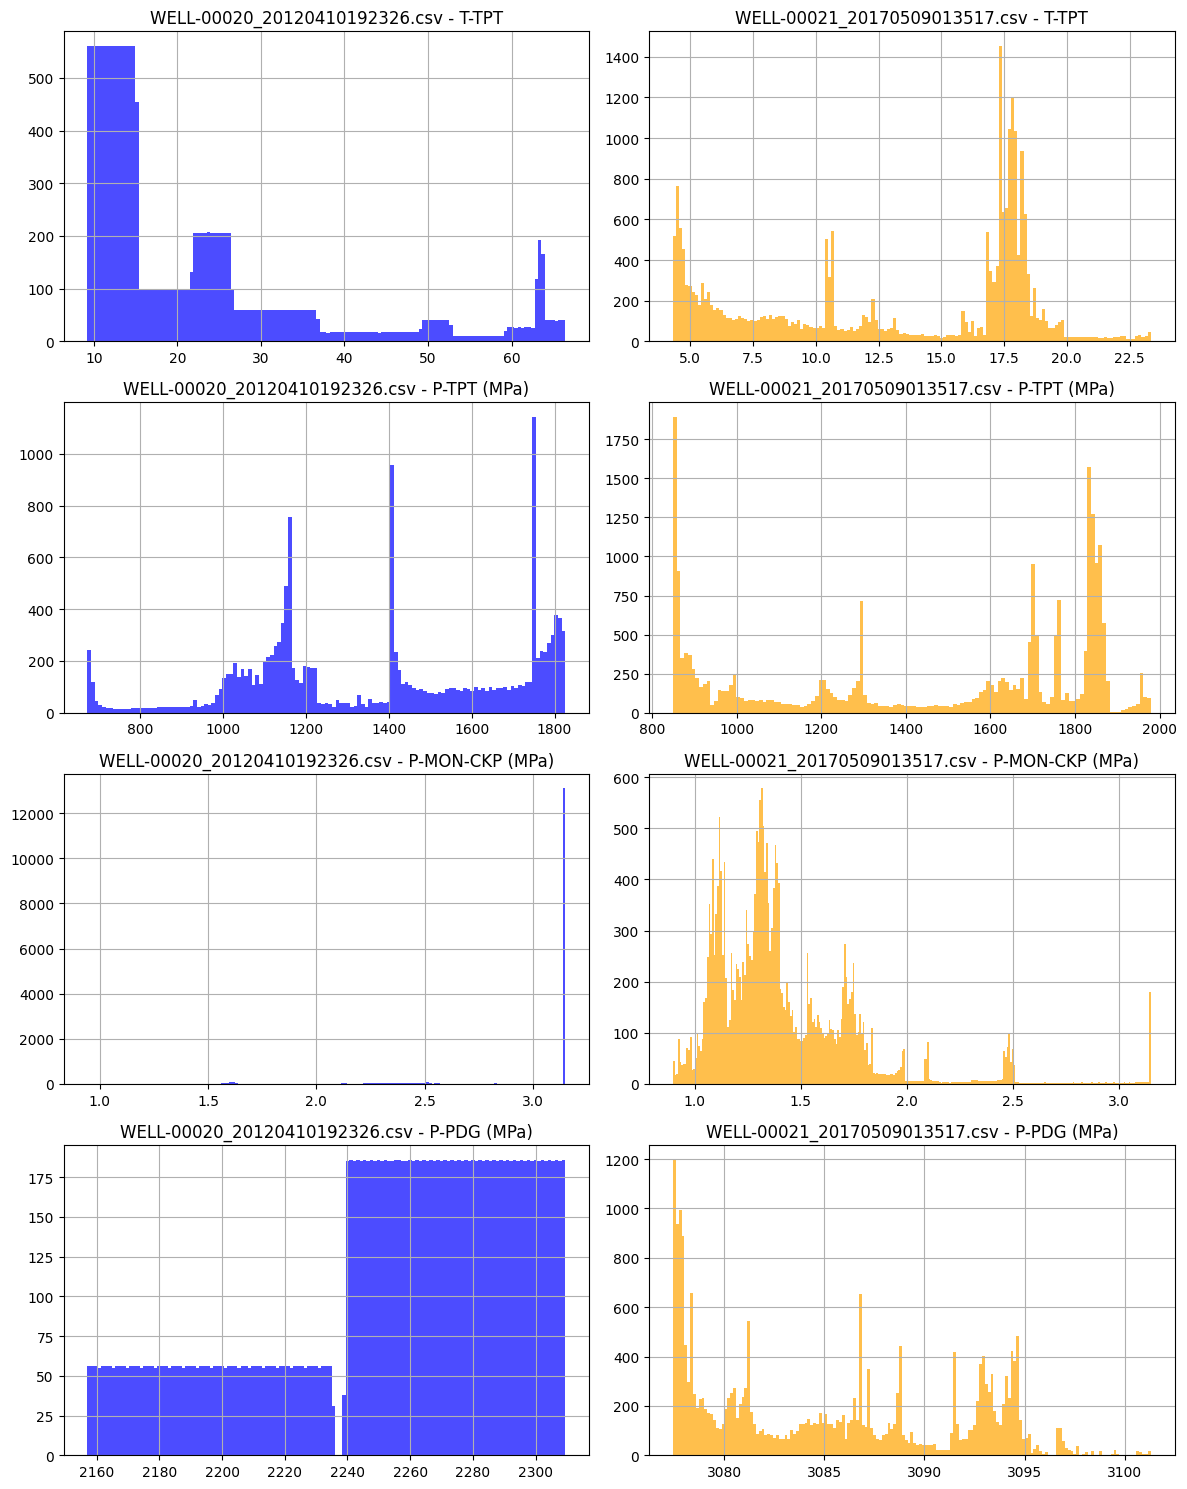

In [35]:
import matplotlib.pyplot as plt
import numpy as np

file_well_20='WELL-00020_20120410192326.csv'
file_well_21='WELL-00021_20170509013517.csv'
df_well_20=dfs[file_well_20]
df_well_21=dfs[file_well_21]

files_selected= {file_well_20: df_well_20, file_well_21: df_well_21 }

variables = ["T-TPT", "P-TPT (MPa)", "P-MON-CKP (MPa)", "P-PDG (MPa)"] # No analizamos de aca T-JUS-CKP porque no tiene valores
# Diccionario para almacenar los intervalos de Scott
intervalos_scott = {file: {} for file in files_selected}

# Calcular el intervalo de Scott para cada variable en cada archivo
for file_name, dff in files_selected.items():
    n = len(dff)  # Cantidad de datos
    for var in variables:
        std = dff[var].std()  # Desviaci√≥n est√°ndar de la variable
        intervalo_scott = (3.5 * std) / np.sqrt(n)  # C√°lculo del intervalo de Scott
        intervalos_scott[file_name][var] = intervalo_scott  # Guardar en el diccionario

# Graficar los histogramas comparando ambos archivos
fig, axes = plt.subplots(len(variables), 2, figsize=(12, 15))  # Dos columnas para comparar

for i, var in enumerate(variables):
    for j, (file_name, dff) in enumerate(files_selected.items()):
        ax = axes[i, j]  # Selecciona la posici√≥n en la cuadr√≠cula
        intervalo_scott = intervalos_scott[file_name][var]  # Obtener el intervalo de Scott
        bins = int((dff[var].max() - dff[var].min()) / intervalo_scott)  # Calcular el n√∫mero de bins
        dff[var].hist(bins=bins, ax=ax, alpha=0.7, color="blue" if j == 0 else "orange")
        ax.set_title(f'{file_name} - {var}')

plt.tight_layout()  # Ajustar autom√°ticamente los espacios entre gr√°ficos
plt.show()

En general, se observa que los datos reales no presentan valores at√≠picos en comparaci√≥n con los datos simulados, salvo en el caso de la presi√≥n P-MON-CKP en el pozo WELL-00020.
Analizando cada variable en detalle:

Temperatura en el transductor T-TPT:

En el pozo WELL-00021, la mayor√≠a de los valores se encuentran entre 10 y 30¬∞C, con una media de 21¬∞C y algunos registros alrededor de 60¬∞C. Debido a la presencia de estos valores altos, la mediana es menor que la media (15¬∞C).
En el pozo WELL-00020, los valores de temperatura son generalmente m√°s bajos, con una media de 13¬∞C y una mayor concentraci√≥n de datos en torno a 18¬∞C, lo que explica que la mediana sea ligeramente mayor (16¬∞C).

Presi√≥n en el transductor P-TPT:

En el pozo WELL-00020, se observan tres picos pronunciados en 1800 MPa, 1400 MPa y 1750 MPa. (Esto sera importante tenerlo en cuenta a la hora de graficar estos valores vs la etiqueta del evento no deseado de la formacion de hidratos)
En el pozo WELL-00021, destaca un pico muy pronunciado en 850 MPa, adem√°s de otros menos marcados en 1700 MPa y 1900 MPa.

Presion aguas abajo del CKP P-MON-CKP:

La P-MON-CKP en el pozo WELL-00020 presenta la mayor frecuencia de valores en 3 MPa, mientras que el resto se distribuye en valores m√°s bajos. Se muestra mas abajo su boxplot para identificar estos outliers.

En el pozo WELL-00021, la distribuci√≥n de valores es m√°s amplia, lo que concuerda con su media de 1.42 MPa y mediana de 1.33 MPa. Se verifico con su boxplot que poseen algunos outliers altos, pero en esta instancia no se ve una relacion directa con la formacion de hidratos.

Presion manometro PDG:

Por otro lado, la presi√≥n en el man√≥metro PDG en el pozo WELL-00020 sugiere que, durante el mismo per√≠odo de tiempo (55 ocurrencias), la presi√≥n se mantuvo en distintos valores entre 2160 y 2235 MPa. Se sospecha que durante un periodo de tiempo constante, la presion iba variando y se mantenia el mismo periodo de tiempo en distintos valores. Posteriormente, la presi√≥n comienza a aumentar, alcanzando 2240 MPa, ahora manteniendose por mayor periodo de tiempo pero constante nuevamente, hasta 2300 Mpa. Esto sera evaluado luego al graficar versus el tiempo esta variable. Tambien es interesante que en esta variable para este pozo no se pudo graficar el boxplot con el mismo algoritmo que se urilizo en todos los casos.

En el pozo WELL-00021, se registran picos de presi√≥n superiores a 3075 MPa, alcanzando hasta 3100 MPa.

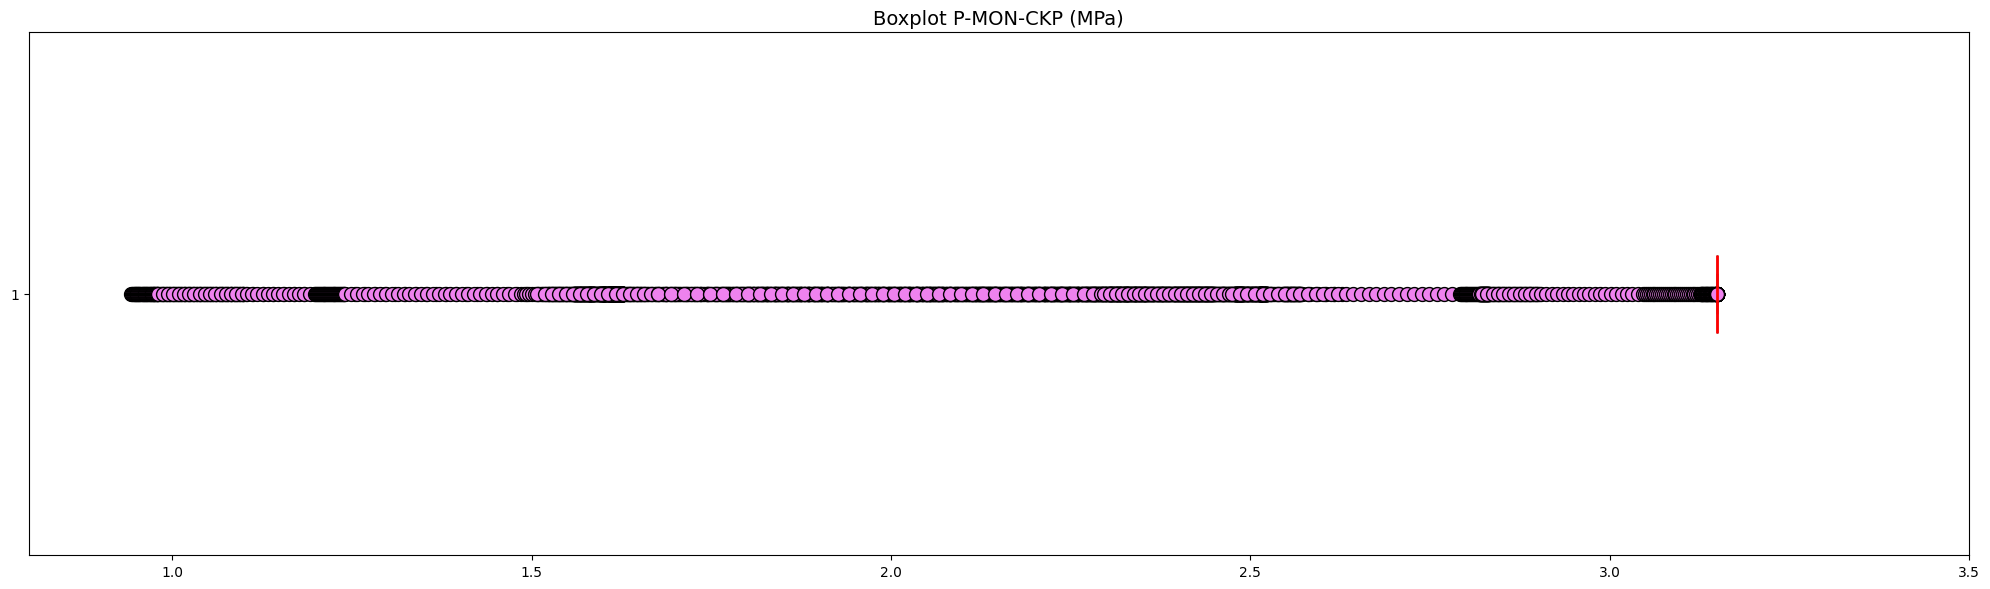

In [36]:
plt.figure(figsize=(20, 6))  # Ajustar tama√±o de la figura si es necesario

# Definir propiedades para los outliers
flierprops = dict(marker='o', markerfacecolor='violet', markersize=10, linestyle='none', markeredgecolor='black')

boxplot_parts = plt.boxplot(df_well_20["P-MON-CKP (MPa)"], vert=False, flierprops=flierprops, patch_artist=True)

# Estilos para la caja, bigotes y mediana (como antes)
boxplot_parts['boxes'][0].set(facecolor='skyblue', edgecolor='black')
for whisker in boxplot_parts['whiskers']:
    whisker.set(color='gray')
for median in boxplot_parts['medians']:
    median.set(color='red', linewidth=2)

plt.title('Boxplot P-MON-CKP (MPa)', fontsize=14)
# plt.yticks([])  # Ocultar ticks del eje Y

# Ajustar la escala horizontal (eje X)
plt.xlim(0.8, 3.5)  # Ajusta los l√≠mites seg√∫n tus datos

plt.tight_layout()
plt.show()

# Estudio de variables a lo largo del tiempo

En esta secci√≥n, se presentan gr√°ficos que muestran la evoluci√≥n de las variables vistas a lo largo del tiempo para datos simulados y reales de los pozos WELL-00020 y WELL-0021.

El objetivo de esta visualizaci√≥n es analizar la variaci√≥n de estas variables con el tiempo y evaluar su relaci√≥n con el evento no deseado de formacion de hidratos. Para ello, se incluye en cada gr√°fico una segunda curva que representa la variable class, cuyos valores (0, 130 y 3) indican el evento normal (0) o el Faulty Transient (Transitorio Defectuoso 103) o Faulty Steady State (Estado Estable Defectuoso 3).

Esta representaci√≥n gr√°fica permitir√° identificar tendencias y posibles patrones en los datos, facilitando una interpretaci√≥n visual de c√≥mo la temperatura y la presi√≥n pueden estar asociadas con la formaci√≥n de hidratos en cada pozo y conjunto de datos simulado.

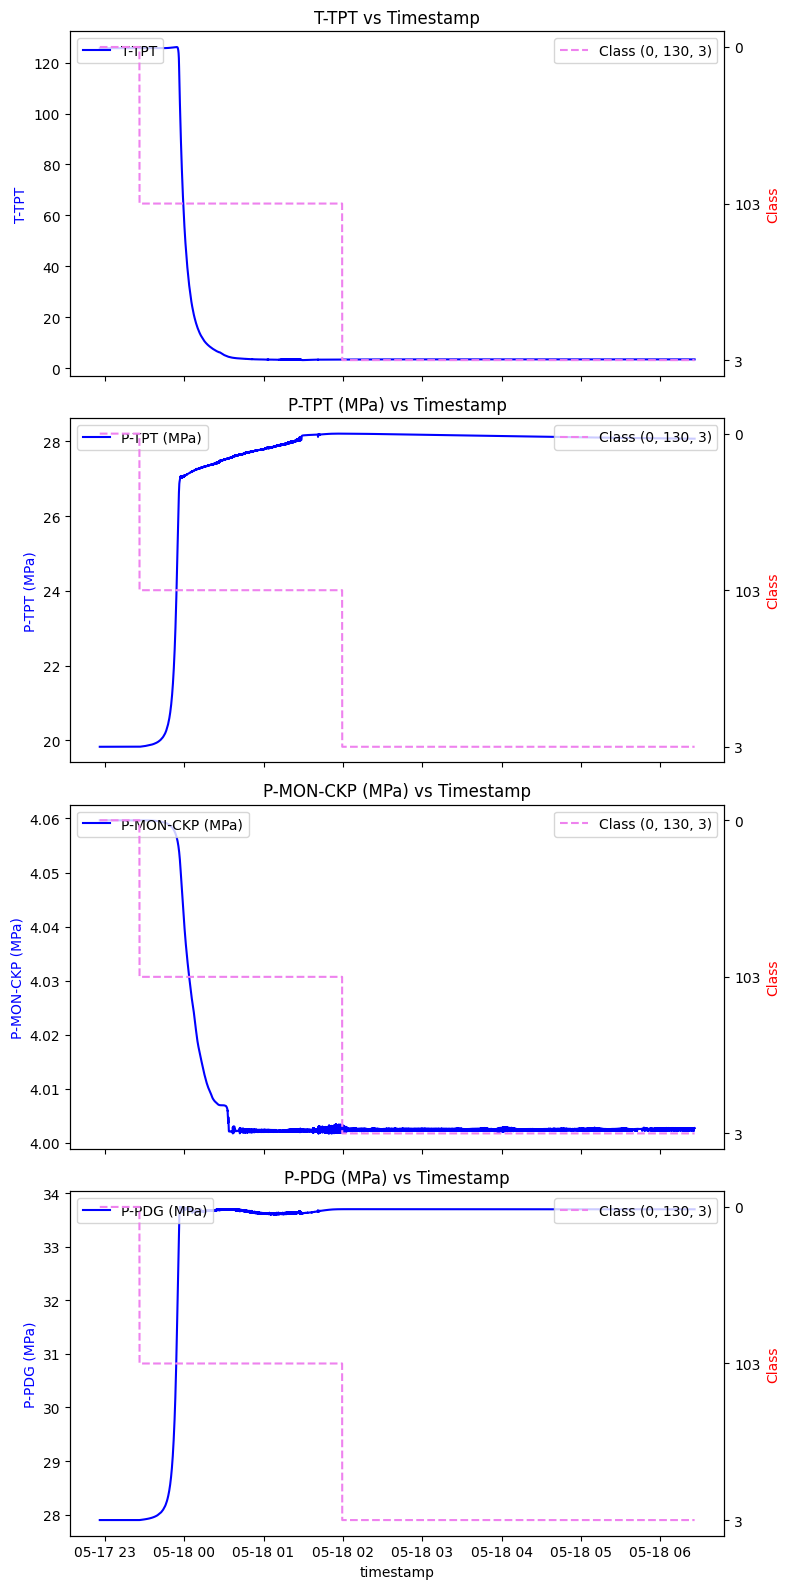

In [37]:
## PRIMER ARCHIVO SIMULADO
import seaborn as sns

# Primer eje Y: Graficar la variable (ejemplo: presi√≥n o temperatura)
df_simulated_1["timestamp"] = pd.to_datetime(df_simulated_1["timestamp"])  # Asegurar formato de fecha
df_simulated_1=df_simulated_1.sort_values(by="timestamp") #en el csv se veia ordenado, pero nos aseguramos igual

variables_ejey = ["T-TPT", "P-TPT (MPa)", "P-MON-CKP (MPa)", "T-JUS-CKP", "P-PDG (MPa)"]

fig, axes = plt.subplots(len(variables), 1, figsize=(8, 4 * len(variables)), sharex=True)

for i, var in enumerate(variables):
    ax1 = axes[i]  # Primer eje Y
    sns.lineplot(x=df_simulated_1["timestamp"], y=df_simulated_1[var], ax=ax1, label=var, color="blue")
    ax1.set_ylabel(var, color="blue")

    # Crear segundo eje Y
    ax2 = ax1.twinx()
    sns.lineplot(x=df_simulated_1["timestamp"], y=df_simulated_1["class"], ax=ax2, color="violet", linestyle="dashed", label="Class (0, 130, 3)")
    ax2.set_ylabel("Class", color="red")

    ax1.set_title(f"{var} vs Timestamp")
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")

plt.xlabel("Timestamp")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Como era de esperarse, la formaci√≥n no deseada de hidratos se manifiesta claramente en valores bajos de temperatura (T-TPT) y altos de presi√≥n en el transductor (P-TPT), en concordancia con las mediciones de presi√≥n en el man√≥metro (P-PDG).

Por otro lado, la presi√≥n aguas arriba de la v√°lvula de control de presi√≥n (PCK) comienza a disminuir a medida que se produce la formaci√≥n de hidratos. Este fen√≥meno puede generar una obstrucci√≥n parcial del flujo, incrementando la resistencia al paso del gas y del fluido. Dicha obstrucci√≥n provoca una ca√≠da de presi√≥n aguas arriba de la v√°lvula de producci√≥n, ya que el flujo se ve dificultado por la acumulaci√≥n de cristales de hidrato. Cuando el gas natural entra en contacto con el agua en condiciones de baja temperatura y alta presi√≥n, se forman los hidratos, lo que contribuye a la disminuci√≥n de la presi√≥n en la l√≠nea de producci√≥n.

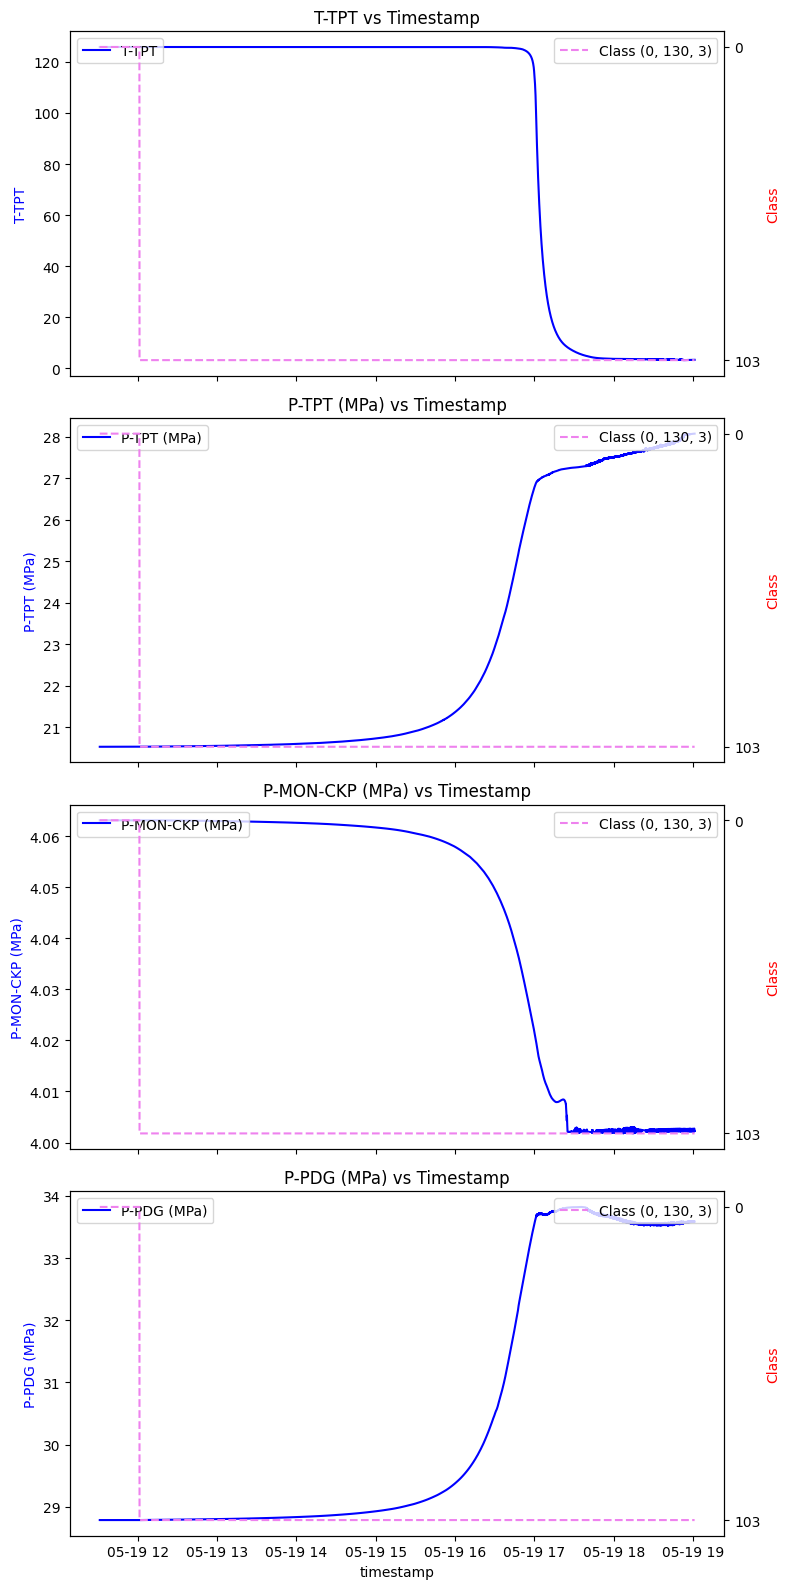

In [38]:
# ULTIMO ARCHIVO SIMULADO
# Primer eje Y: Graficar la variable (ejemplo: presi√≥n o temperatura)
file_simulated_81='SIMULATED_00081.csv'
df_simulated_81=dfs[file_simulated_81]

df_simulated_81["timestamp"] = pd.to_datetime(df_simulated_81["timestamp"])  # Asegurar formato de fecha
df_simulated_81=df_simulated_81.sort_values(by="timestamp") #en el csv se veia ordenado, pero nos aseguramos igual

variables_ejey = ["T-TPT", "P-TPT (MPa)", "P-MON-CKP (MPa)", "T-JUS-CKP", "P-PDG (MPa)"]

fig, axes = plt.subplots(len(variables), 1, figsize=(8, 4 * len(variables)), sharex=True)

for i, var in enumerate(variables):
    ax1 = axes[i]  # Primer eje Y
    sns.lineplot(x=df_simulated_81["timestamp"], y=df_simulated_81[var], ax=ax1, label=var, color="blue")
    ax1.set_ylabel(var, color="blue")

    # Crear segundo eje Y
    ax2 = ax1.twinx()
    sns.lineplot(x=df_simulated_81["timestamp"], y=df_simulated_81["class"], ax=ax2, color="violet", linestyle="dashed", label="Class (0, 130, 3)")
    ax2.set_ylabel("Class", color="red")

    ax1.set_title(f"{var} vs Timestamp")
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")

plt.xlabel("Timestamp")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

En el segundo conjunto de datos simulado, el evento 103 se presenta nuevamente a bajas temperaturas en el traductor T-TPT y con valores elevados de presi√≥n en P-TPT, en concordancia con los valores de P-PDG. La principal diferencia en este caso es que los valores se mantienen por un per√≠odo prolongado en niveles altos de T y en valores bajos de P-TPT y P-PDG. Sin embargo, el evento 103 se hace evidente incluso antes de que los valores de T comiencen a descender y los de P aumenten. Es probable que este conjunto de datos corresponda a un momento previo a la formaci√≥n de hidratos. Dado que se trata de simulaciones, es posible que se est√© enfocando en los par√°metros previos al evento no deseado, esto es lo que el documento explicativo de los datos llama como per√≠odos transitorios defectuosos.

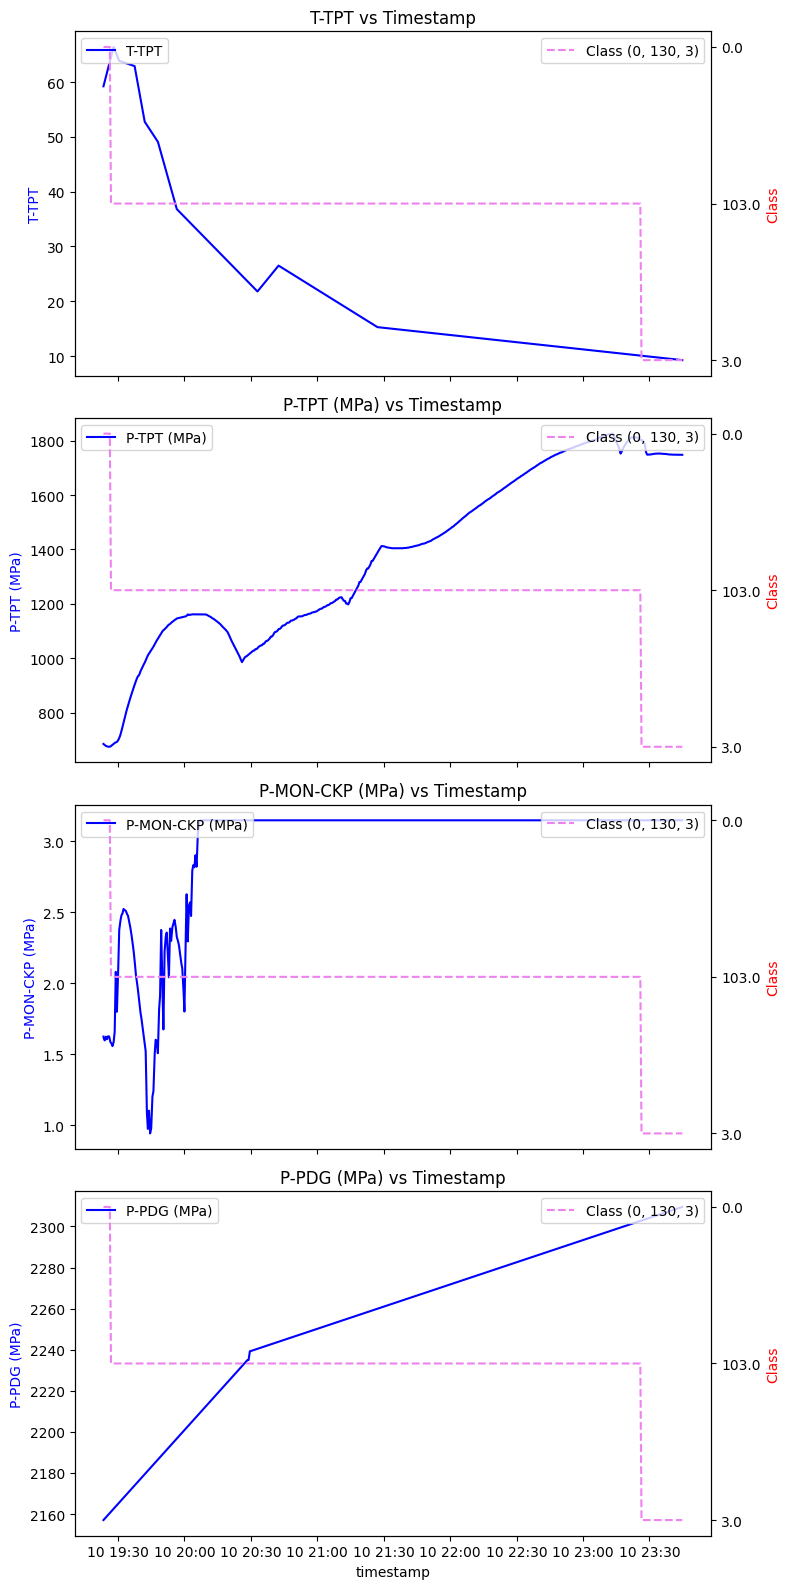

In [39]:
## POZO WELL-00020

# Primer eje Y: Graficar la variable (ejemplo: presi√≥n o temperatura)
df_well_20["timestamp"] = pd.to_datetime(df_well_20["timestamp"])  # Asegurar formato de fecha
df_well_20=df_well_20.sort_values(by="timestamp") #en el csv se veia ordenado, pero nos aseguramos igual

##se encontraron NaN en la columna class
# Filtrar las filas donde 'class' es igual a la cadena 'nan' (mas arriba la habia pasado a string)
nan_rows = df_well_20[df_well_20['class'] == 'nan']

# Visualiza los registros completos con NaN en la columna 'class'
# print(nan_rows)
filtered_df_well_20 = df_well_20[df_well_20['class'] != 'nan']

variables_ejey = ["T-TPT", "P-TPT (MPa)", "P-MON-CKP (MPa)", "T-JUS-CKP", "P-PDG (MPa)"]

fig, axes = plt.subplots(len(variables), 1, figsize=(8, 4 * len(variables)), sharex=True)

for i, var in enumerate(variables):
    ax1 = axes[i]  # Primer eje Y
    sns.lineplot(x=df_well_20["timestamp"], y=df_well_20[var], ax=ax1, label=var, color="blue")
    ax1.set_ylabel(var, color="blue")

    # Crear segundo eje Y
    ax2 = ax1.twinx()
    sns.lineplot(x=filtered_df_well_20["timestamp"], y=filtered_df_well_20["class"], ax=ax2, color="violet", linestyle="dashed", label="Class (0, 130, 3)")
    ax2.set_ylabel("Class", color="red")

    ax1.set_title(f"{var} vs Timestamp")
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")

plt.xlabel("Timestamp")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

En este pozo, se observ√≥ inicialmente que algunos registros no estaban etiquetados, por lo que se aplic√≥ un filtro para la curva Class exclusivamente, sin filtrar las curvas de las variables en funci√≥n del tiempo.

En t√©rminos generales, los valores mostrados son m√°s realistas, ya que las curvas no presentan un comportamiento exponencial (ni de aumento ni de disminuci√≥n). En su lugar, se evidencian fluctuaciones al aumentar o disminuir.

Se puede visualizar que el evento de tipo transitorio defectuoso comienza cuando la temperatura en el transductor **T-TPT** baja de +60¬∞C a menos de 40¬∞C. La formaci√≥n de hidratos finalmente ocurre cuando la temperatura desciende a **10¬∞C**. En relaci√≥n con la presi√≥n en el transductor **P-TPT**, el evento transitorio defectuoso comienza cuando la presi√≥n aumenta desde 676 MPa y finalmente se estabiliza en aproximadamente **1800 MPa.**

En cuanto a la presi√≥n en el man√≥metro **P-PDG**, se observa un aumento lineal al principio con una pendiente m√°s pronunciada hasta llegar a 2240 MPa, seguido de una pendiente menor hasta alcanzar los 2300 MPa. Esto explica por qu√© el histograma mostr√≥ dos picos con techos bastante planos. Cuando la presi√≥n del pozo supera los **2300 MPa**, el evento de formaci√≥n de hidratos se estabiliza.

La presi√≥n aguas arriba de la v√°lvula de choke de producci√≥n P-MON-CKP fluct√∫a inicialmente, pero luego se mantiene estable en 3 MPa, lo cual difiere de los escenarios simulados, donde la presi√≥n aumenta. Esto podria deberse a las condiciones iniciales ya que en los escenarios simulados baja hasta 4MPa y en este caso se estabiliza en 3MPa.

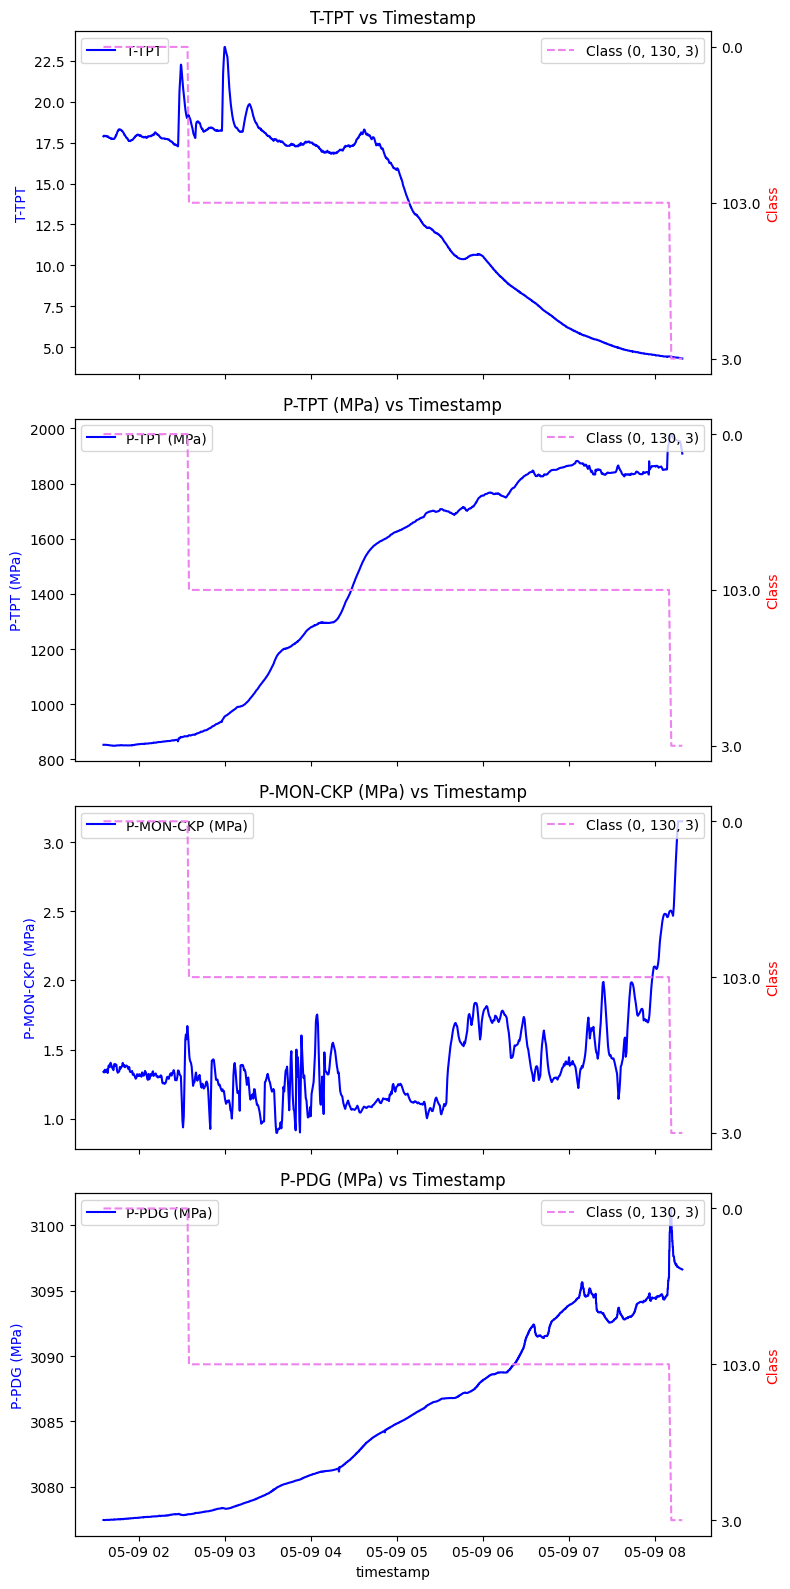

In [40]:
## POZO WELL-00021

# Primer eje Y: Graficar la variable (ejemplo: presi√≥n o temperatura)
df_well_21["timestamp"] = pd.to_datetime(df_well_21["timestamp"])  # Asegurar formato de fecha
df_well_21=df_well_21.sort_values(by="timestamp") #en el csv se veia ordenado, pero nos aseguramos igual

##se encontraron NaN en la columna class
# Filtrar las filas donde 'class' es igual a la cadena 'nan' (mas arriba la habia pasado a string)
nan_rows = df_well_21[df_well_21['class'] == 'nan']

# Visualiza los registros completos con NaN en la columna 'class'
# print(nan_rows)
filtered_df_well_21 = df_well_21[df_well_21['class'] != 'nan']

variables_ejey = ["T-TPT", "P-TPT (MPa)", "P-MON-CKP (MPa)", "T-JUS-CKP", "P-PDG (MPa)"]

fig, axes = plt.subplots(len(variables), 1, figsize=(8, 4 * len(variables)), sharex=True)

for i, var in enumerate(variables):
    ax1 = axes[i]  # Primer eje Y
    sns.lineplot(x=df_well_21["timestamp"], y=df_well_21[var], ax=ax1, label=var, color="blue")
    ax1.set_ylabel(var, color="blue")

    # Crear segundo eje Y
    ax2 = ax1.twinx()
    sns.lineplot(x=filtered_df_well_21["timestamp"], y=filtered_df_well_21["class"], ax=ax2, color="violet", linestyle="dashed", label="Class (0, 130, 3)")
    ax2.set_ylabel("Class", color="red")

    ax1.set_title(f"{var} vs Timestamp")
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")

plt.xlabel("Timestamp")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

En el pozo WELL_0021, tanto la temperatura como la presi√≥n en el transductor **T-TPT** y **P-TPT** siguen una tendencia similar al pozo WELL_0020 respecto a los eventos transitorios defectuosos y estables defectuosos. La formaci√≥n de hidratos comienza a establecerse cuando la temperatura alcanza los **5¬∞C** y la presi√≥n supera los **1800 MPa.**

La presi√≥n de fondo del pozo **P-PDG** muestra un aumento gradual, y el evento de formaci√≥n de hidratos se produce a presiones superiores a **3095 MPa.**

En cuanto a la presi√≥n aguas arriba de la v√°lvula de choke de producci√≥n P-MON-CKP, se observa un comportamiento similar al del pozo anterior. Comienza con un valor inicial de 1.4 MPa, presenta fluctuaciones durante los eventos transitorios defectuosos, y durante la formaci√≥n estable de hidratos, la presi√≥n aumenta hasta alcanzar los 3 MPa.



# Conclusi√≥n del analisis de datos

El an√°lisis de los datos de temperatura (T-TPT) y presi√≥n (P-TPT) en los eventos de formaci√≥n de hidratos ha permitido identificar patrones y diferencias significativas tanto en los pozos reales como en los datos simulados. En los pozos reales, los eventos de formaci√≥n de hidratos se inician cuando la temperatura en el transductor baja por debajo de un umbral cr√≠tico, generalmente alrededor de los 10/5¬∞C en datos reales y 3¬∞C en datos simulados, y las presiones superan los 1800 MPa en casos reales y 28 MPa en escenarios simulados.  Esta discrepancia podria deberse a que los datos simulados han sido generados bajo condiciones m√°s controladas y dentro de rangos operativos definidos, mientras que los datos reales reflejan la variabilidad de los pozos en operaci√≥n, incluyendo condiciones extremas que pueden presentarse en la industria.

La formaci√≥n de hidratos en pozos reales tambien depende en gran medida de la cantidad de agua presente en la corriente de gas, as√≠ como de la composici√≥n de los hidrocarburos, que influye en la temperatura y presi√≥n a las cuales los hidratos pueden formarse. En pozos con mayor contenido de agua o presencia de hidrocarburos m√°s ligeros, la formaci√≥n de hidratos puede ocurrir a presiones no tan altas o temperaturas no tan bajas, mientras que en sistemas con menos agua o hidrocarburos m√°s pesados, los hidratos tienden a formarse en condiciones m√°s estrictas de temperatura y presi√≥n.

En cuanto a los datos simulados, estos muestran una mayor consistencia y previsibilidad en los eventos de formaci√≥n de hidratos, lo cual es una caracter√≠stica com√∫n de las simulaciones num√©ricas. Sin embargo, estos datos a menudo no reflejan completamente las variaciones y complejidades presentes en los pozos reales, como las fluctuaciones en las presiones o las posibles interacciones no modeladas entre los diferentes componentes del sistema (agua, gas, hidrocarburos). Las simulaciones tienden a seguir patrones m√°s uniformes, lo que puede no capturar completamente la heterogeneidad observada en el entorno operativo real.

En resumen, mientras que los datos de pozos reales muestran una variabilidad inherente a las condiciones del campo, los datos simulados proporcionan una referencia m√°s estable y predecible. La diferencia en los valores entre ambos conjuntos de datos se puede atribuir a factores como la composici√≥n del gas, el contenido de agua y las condiciones operacionales de los pozos, lo que hace que las simulaciones sean una herramienta valiosa para la predicci√≥n y el an√°lisis.


# Definici√≥n del Objetivo y Preprocesamiento de Datos

En esta segunda etapa del an√°lisis, el objetivo principal es predecir la formaci√≥n de hidratos en funci√≥n de las variables definidas al inicio. Para ello, se aplicar√° un modelo de aprendizaje supervisado, dado que contamos con datos etiquetados que indican la presencia o ausencia de hidratos (columna class con valores 0, 130 y 3).

Antes de seleccionar el modelo, es fundamental realizar un preprocesamiento de los datos para asegurar su calidad y relevancia. En esta etapa, se evaluar√° la necesidad de aplicar t√©cnicas como:

Feature Encoding: En caso de contar con variables categ√≥ricas que requieran conversi√≥n a formato num√©rico. En este trabajo no sera necesario ya que se cuenta con variables numericas.

**Feature Selection** : Identificaci√≥n de las variables m√°s relevantes para el modelo, eliminando aquellas que no aporten informaci√≥n significativa o generen ruido en la predicci√≥n. Esto se realizara primero con Spearman/Kendall, ya que la variable target es de tipo categorica (aunque ya en mi dataset la tengo numerica) y luego con Information Gail.

Una vez completado este proceso, se proceder√° a la selecci√≥n, entrenamiento y evaluaci√≥n del modelo de predicci√≥n.

Tambien es importante destacar que en esta segunda parte del trabajo, se va a trabajar con un solo dataframe en donde se incluyan todos los archivos csvs listados. Vamos a retomar desde la variable sorted_files definida al inicio para crear el nuevo dataframe df_total. Por otro lado, se va a realizar durante la misma carga de csvs al dataframe la conversion del tipo de dato object de class a numerico para eliminar los que no estaban etiquetados.

In [41]:
# Cargar y concatenar los archivos directamente en un √∫nico DataFrame
df_hidratos = pd.concat(
    [pd.read_csv(os.path.join(data_path, file)) for file in sorted_files],
    ignore_index=True
)

# Convertir a MPa si las columnas existen
if "P-PDG" in df_hidratos.columns:
    df_hidratos["P-PDG (MPa)"] = df_hidratos["P-PDG"] / 1e6  # Convertir a MPa
if "P-TPT" in df_hidratos.columns:
    df_hidratos["P-TPT (MPa)"] = df_hidratos["P-TPT"] / 1e6  # Convertir a MPa
if "P-MON-CKP" in df_hidratos.columns:
    df_hidratos["P-MON-CKP (MPa)"] = df_hidratos["P-MON-CKP"] / 1e6  # Convertir a MPa

# Imprime las columnas para verificar si existen en el DataFrame
print(df_hidratos.columns)

# Elimina las columnas si existen
columns_to_drop = ['P-JUS-CKGL', 'T-JUS-CKGL', 'QGL']
df_hidratos.drop(columns=[col for col in columns_to_drop if col in df_hidratos.columns], inplace=True)

# Verifica que se han eliminado correctamente
print(df_hidratos.columns)


# Convertir 'class' a n√∫mero, forzando valores no num√©ricos a NaN
df_hidratos['class'] = pd.to_numeric(df_hidratos['class'], errors='coerce')

# Eliminar registros con NaN en 'class'
df_hidratos.dropna(subset=['class'], inplace=True)

# Convertir 'class' a entero si no tiene decimales
df_hidratos['class'] = df_hidratos['class'].astype(int)

# Verificar estructura final
print(f"‚úÖ Se cargaron {len(sorted_files)} archivos.")
print(f"üìä Filas totales despu√©s de limpieza: {df_hidratos.shape[0]}")
print(df_hidratos.info())  # Ver detalles del DataFrame
print(df_hidratos.head())  # Primeras filas

Index(['timestamp', 'P-PDG', 'P-TPT', 'T-TPT', 'P-MON-CKP', 'T-JUS-CKP',
       'P-JUS-CKGL', 'T-JUS-CKGL', 'QGL', 'class', 'P-PDG (MPa)',
       'P-TPT (MPa)', 'P-MON-CKP (MPa)'],
      dtype='object')
Index(['timestamp', 'P-PDG', 'P-TPT', 'T-TPT', 'P-MON-CKP', 'T-JUS-CKP',
       'class', 'P-PDG (MPa)', 'P-TPT (MPa)', 'P-MON-CKP (MPa)'],
      dtype='object')
‚úÖ Se cargaron 84 archivos.
üìä Filas totales despu√©s de limpieza: 2277642
<class 'pandas.core.frame.DataFrame'>
Index: 2277642 entries, 0 to 2278010
Data columns (total 10 columns):
 #   Column           Dtype  
---  ------           -----  
 0   timestamp        object 
 1   P-PDG            float64
 2   P-TPT            float64
 3   T-TPT            float64
 4   P-MON-CKP        float64
 5   T-JUS-CKP        float64
 6   class            int64  
 7   P-PDG (MPa)      float64
 8   P-TPT (MPa)      float64
 9   P-MON-CKP (MPa)  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 191.1+ MB
None
                    t

In [42]:
from scipy.stats import spearmanr, kendalltau

variables_=["P-PDG","P-TPT","T-TPT","P-MON-CKP","T-JUS-CKP"]

# Verifica cu√°ntos valores nulos tienes por columna
print(df_hidratos.isnull().sum())

# Eliminar todas las filas con valores nulos en cualquier columna
df_hidratos_clean = df_hidratos.dropna()

# Verifica cu√°ntas filas han quedado despu√©s del filtrado
print(df_hidratos_clean.shape)

# Inicializamos un diccionario para almacenar las correlaciones
correlations = {}

# Crear gr√°ficos de dispersi√≥n para ver la relaci√≥n entre cada variable y 'class'
for var_ in variables_:
    corr, _ = spearmanr(df_hidratos_clean[var_], df_hidratos_clean['class'])
    correlations[var_] = corr

# Convertimos el diccionario en un dataframe para visualizaci√≥n
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Variable', 'Spearman Correlation'])

# Ordenamos las variables por la correlaci√≥n
correlation_df = correlation_df.sort_values(by='Spearman Correlation', ascending=False)

print("Correlaciones de Spearman entre las variables y el target:")
print(correlation_df)


timestamp              0
P-PDG                 30
P-TPT                  0
T-TPT                  0
P-MON-CKP              0
T-JUS-CKP          90722
class                  0
P-PDG (MPa)           30
P-TPT (MPa)            0
P-MON-CKP (MPa)        0
dtype: int64
(2186920, 10)
Correlaciones de Spearman entre las variables y el target:
    Variable  Spearman Correlation
4  T-JUS-CKP                  0.46
2      T-TPT                  0.27
3  P-MON-CKP                  0.07
0      P-PDG                 -0.22
1      P-TPT                 -0.27


Si bien se observan valores bajos, se va a realizar tambien la tecnica de information gain. Dado que se conoce que las presiones y las temperaturas en el traductor TPT son variables que se relacionan directamente con el evento de formacion de hidratos (se comprobo en el analisis anterior como se cito en las conclusiones y se observo en los graficos), se toma la decision de seleccionar las variables con un information gain (y Spearman Correlation)  mayores a los de estas variables T-TPT y P-TPT.

In [43]:
from sklearn.feature_selection import mutual_info_classif

# Inicializar un diccionario para almacenar el Information Gain
info_gain_dict = {}

# Calcular el Information Gain para cada variable respecto a 'class'
for var_ in variables_:
    ig = mutual_info_classif(df_hidratos_clean[[var_]], df_hidratos_clean['class'], discrete_features='auto')[0]
    info_gain_dict[var_] = ig

# Convertir el diccionario en un DataFrame para visualizaci√≥n
info_gain_df = pd.DataFrame(list(info_gain_dict.items()), columns=['Variable', 'Information Gain'])

# Ordenar las variables por Information Gain
info_gain_df = info_gain_df.sort_values(by='Information Gain', ascending=False)

print("Information Gain entre las variables y el target:")
print(info_gain_df)

Information Gain entre las variables y el target:
    Variable  Information Gain
0      P-PDG              0.68
4  T-JUS-CKP              0.66
1      P-TPT              0.61
2      T-TPT              0.61
3  P-MON-CKP              0.55


De esta manera, se va a llevar a cabo el modelado teniendo en cuenta las variables **P-PDG, P-TPT, T-TPT, T-JUS-CKP**, descartando asi la variable P-MON-CKP.

# Eleccion del modelo

Dado que en la seccion del EDA del dataset se hizo el analisis sobre los csvs separados, a continuacion se realizara una prueba de normalidad sobre el dataset completo y limpio:

In [44]:
from scipy.stats import shapiro, normaltest, kstest

# Excluir 'class' y 'P-MON-CKP'
columns_to_exclude = ['class', 'P-MON-CKP']
df_filtered = df_hidratos_clean.drop(columns=columns_to_exclude, errors='ignore')

# Filtrar solo columnas num√©ricas
numeric_cols = df_filtered.select_dtypes(include=['number']).columns

# Diccionario para guardar los resultados
normality_results = {}

for col in numeric_cols:
    data = df_filtered[col].dropna()  # Eliminar valores nulos
    if len(data) > 3:  # Asegurar que haya suficientes datos para la prueba
        dagostino_p = normaltest(data)[1]  # p-valor de D'Agostino-Pearson
        ks_p = kstest(data, 'norm')[1]  # p-valor de Kolmogorov-Smirnov

        normality_results[col] = {
            "D'Agostino p": dagostino_p,
            "KS p": ks_p
        }

# Convertimos los resultados a DataFrame para mejor visualizaci√≥n
normality_df = pd.DataFrame.from_dict(normality_results, orient='index')

print("Resultados de la prueba de normalidad:")
print(normality_df)

Resultados de la prueba de normalidad:
                 D'Agostino p  KS p
P-PDG                    0.00  0.00
P-TPT                    0.00  0.00
T-TPT                    0.00  0.00
T-JUS-CKP                0.00  0.00
P-PDG (MPa)              0.00  0.00
P-TPT (MPa)              0.00  0.00
P-MON-CKP (MPa)          0.00  0.00


Dado que todos los valores resultan en 0, se confirma que los datos no siguen una distribuci√≥n normal. A continuaci√≥n, se presentan los histogramas con sus respectivas curvas de densidad, esta vez aplicados a la totalidad del dataframe, ya que los gr√°ficos anteriores solo consideraban una parte de los datos.

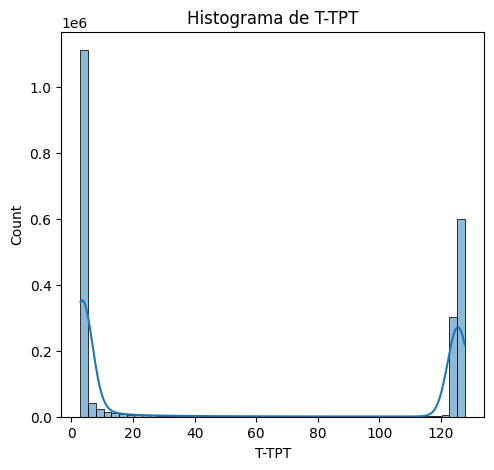

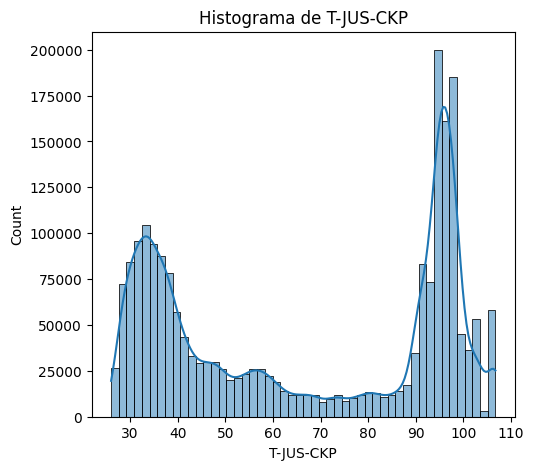

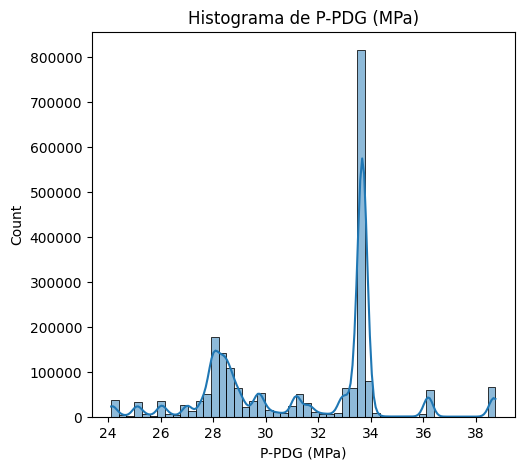

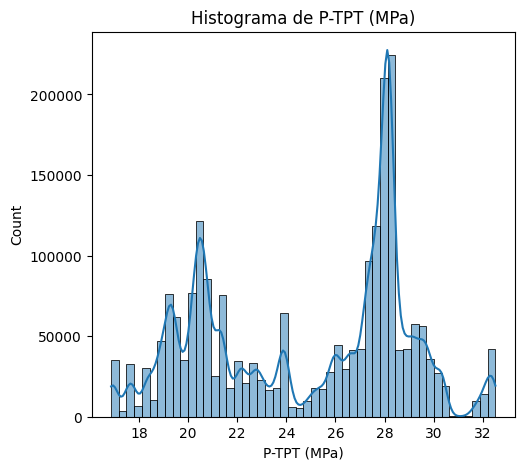

In [45]:
import scipy.stats as stats

columnas_a_graficar=['T-TPT', 'T-JUS-CKP', 'P-PDG (MPa)', 'P-TPT (MPa)']

for col in columnas_a_graficar:
    plt.figure(figsize=(12, 5))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(df_filtered[col].dropna(), kde=True, bins=50)
    plt.title(f"Histograma de {col}")

    plt.show()


## √Årboles de Decisi√≥n (Random Forest)

Dado que mi conjunto de datos incluye m√°s de 2 millones de registros, el modelo que mejor se adapta a esta cantidad de datos y a las caracter√≠sticas de las variables predictoras es un modelo basado en √°rboles de decisi√≥n, como es Random Forest.

1. **Variables Predictoras Continuas:** Las variables seleccionadas para la
predicci√≥n son continuas, y estas son:

* 'T-TPT'
* 'T-JUS-CKP'
* 'P-PDG'
* 'P-TPT'

Los √°rboles de decisi√≥n manejan de manera eficiente variables continuas, dividiendo los datos en funci√≥n de umbrales espec√≠ficos. Este enfoque es particularmente √∫til en mi caso, donde las relaciones entre las variables predictoras y la variable objetivo pueden no ser lineales o complejas, lo cual hace que los modelos basados en √°rboles sean una opci√≥n adecuada.

2.** Distribuci√≥n No Normal: **Una caracter√≠stica importante es que los datos no siguen una distribuci√≥n normal. Sin embargo, los √°rboles de decisi√≥n no requieren que los datos sean normalmente distribuidos, lo que los hace muy adecuados para este tipo de conjuntos de datos. No es necesario aplicar transformaciones como logaritmos o Box-Cox, lo que simplifica el proceso de modelado.

3.** Tama√±o del Conjunto de Datos:** Con m√°s de 2 millones de registros, los √°rboles de decisi√≥n son una opci√≥n robusta que puede manejar grandes vol√∫menes de datos de manera eficiente. Modelos como Random Forest y XGBoost son especialmente efectivos para este tipo de situaciones, ya que distribuyen el proceso de decisi√≥n en m√∫ltiples √°rboles, lo que mejora la precisi√≥n y evita el sobreajuste.

A continuacion, se importartan las librer√≠as necesarias para cargar los datos, procesarlos y entrenar el modelo. Se utiliza sklearn para los modelos y la divisi√≥n de datos.

Luego, se seleccionan las variables predictorias y la variable categorica target:

In [46]:
# Importar librer√≠as necesarias
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# dividimos el df en variables predictorias y target:
X = df_hidratos_clean[['T-TPT', 'T-JUS-CKP', 'P-PDG', 'P-TPT']]  # Variables predictoras-Se dejan en Pa las P
y = df_hidratos_clean['class']  # Variable objetivo

X = X.drop_duplicates() # Eliminar filas duplicadas
y = y.loc[X.index]  # Asegurar que la variable objetivo tenga las mismas filas

# Contar filas duplicadas en el dataset original
print(f"N√∫mero total de filas en X: {X.shape[0]}")
print(f"N√∫mero de filas √∫nicas en X: {X.drop_duplicates().shape[0]}")


N√∫mero total de filas en X: 2060371
N√∫mero de filas √∫nicas en X: 2060371


Luego, se dividen los datos en un conjunto de entrenamiento (train) y un conjunto de prueba (test). Aqu√≠, un porcentaje del dataset se utilizar√° para entrenar el modelo y el otro para evaluarlo.

Se tendra en cuenta en este punto el concepto de estratificacion. La estratificaci√≥n es un proceso en el que dividimos los datos de manera que cada subconjunto (entrenamiento y prueba) tenga una distribuci√≥n representativa de las caracter√≠sticas que se estan estudiando. En lugar de hacer una divisi√≥n aleatoria de los datos, se va a estratificar de acuerdo con las caracter√≠sticas, asegurando que ambas distribuciones (de los valores bajos y los altos de presiones y temperaturas) est√©n representadas en ambos conjuntos.

La estratificaci√≥n autom√°tica de train_test_split con el par√°metro stratify basado en la variable target asegurar√° que tanto el conjunto de entrenamiento como el de prueba tengan una distribuci√≥n proporcional de las clases de la variable objetivo. De esta manera:





In [47]:
# Dividir el conjunto de datos en train y test (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Se realiza este calculo porque en el primer entrenamiento la evaluacion fue casi perfecta
duplicated_rows = X_train.merge(X_test, how='inner', on=list(X_train.columns))
print(f"N√∫mero de filas duplicadas entre train y test: {len(duplicated_rows)}")

# Instanciar el modelo de Random Forest
model = RandomForestClassifier(
    n_estimators=100,       # N√∫mero de √°rboles
    max_depth=12,           # Controlamos la profundidad de los √°rboles
    min_samples_split=10,   # N√∫mero m√≠nimo de muestras para dividir un nodo
    min_samples_leaf=5,     # N√∫mero m√≠nimo de muestras por hoja
    random_state=42,        # Fijar semilla para reproducibilidad
    class_weight='balanced' # Ajustar los pesos de las clases
)

# Despu√©s de haber instanciado el modelo, se entrena con los datos de entrenamiento (X_train, y_train).
model.fit(X_train, y_train)

N√∫mero de filas duplicadas entre train y test: 0


RandomForestClassifier(class_weight='balanced', max_depth=12,
                       min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

Finalmente, se evalua el modelo utilizando los datos de prueba (X_test, y_test). Dado que es un modelo de clasificaci√≥n, se utiliza la matriz de confusi√≥n para ver c√≥mo el modelo clasifica las diferentes categor√≠as (0, 103, 3).

La matriz de confusi√≥n proporciona la cantidad de predicciones correctas e incorrectas para cada clase de la variable objetivo (0, 103, 3).
Adem√°s, el reporte de clasificaci√≥n da m√©tricas como precisi√≥n, recall, f1-score, que ayudan a evaluar el rendimiento del modelo en cada clase.

In [48]:
# Predecir las clases en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar con la matriz de confusi√≥n
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusi√≥n:")
print(conf_matrix)

# Tambi√©n podemos obtener el reporte de clasificaci√≥n
class_report = classification_report(y_test, y_pred)
print("Reporte de clasificaci√≥n:")
print(class_report)

Matriz de confusi√≥n:
[[  4313      0      0]
 [     0 120515    113]
 [    72   2329 284733]]
Reporte de clasificaci√≥n:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4313
           3       0.98      1.00      0.99    120628
         103       1.00      0.99      1.00    287134

    accuracy                           0.99    412075
   macro avg       0.99      1.00      0.99    412075
weighted avg       0.99      0.99      0.99    412075



La **matriz de confusi√≥n** muestra lo siguiente:
* **Clase 0 (fila 1):**
4313 casos correctamente clasificados (todos los ejemplos de la clase 0 fueron bien predichos).
0 falsos positivos y 0 falsos negativos, lo que indica un recall perfecto (1.00).

* **Clase 3 (fila 2):**
120,515 casos bien clasificados.
113 casos fueron err√≥neamente clasificados como clase 103.
Muy pocos errores, con un recall cercano a 1.00.

* **Clase 103 (fila 3):**
284,733 casos bien clasificados.
72 casos fueron clasificados err√≥neamente como clase 0.
2,329 casos fueron clasificados err√≥neamente como clase 3.

El **reporte de clasificacion** muestra un modelo con alta precisi√≥n y recall en todas las clases, lo que indica un excelente desempe√±o en la clasificaci√≥n:

* **Clase 0:**

  *  Precisi√≥n: 0.98 ‚Üí El 98% de los casos predichos como 0 eran realmente de esta clase.
  *  Recall: 1.00 ‚Üí Todas las instancias de la clase 0 fueron correctamente identificadas.
  *  F1-score: 0.99 ‚Üí Excelente equilibrio entre precisi√≥n y recall.

* **Clase 3:**

  *  Precisi√≥n: 0.98
  *  Recall: 1.00
  *  F1-score: 0.99

* **Clase 103:**

  *  Precisi√≥n: 1.00
  *  Recall: 0.99
  *  F1-score: 1.00

* Accuracy total: 0.99, lo que significa que el modelo acierta en el 99% de las predicciones.

Estos resultados sugieren que el modelo ha logrado un equilibrio adecuado entre precisi√≥n y recall, asegurando que tanto clases mayoritarias como minoritarias sean bien representadas.

**Ajuste del Modelo y Prevenci√≥n de Sobreajuste**

Inicialmente, tras entrenar el modelo de Random Forest con 100 √°rboles y sin restricciones en la profundidad, se evalu√≥ su desempe√±o en el conjunto de prueba. Los resultados obtenidos fueron:

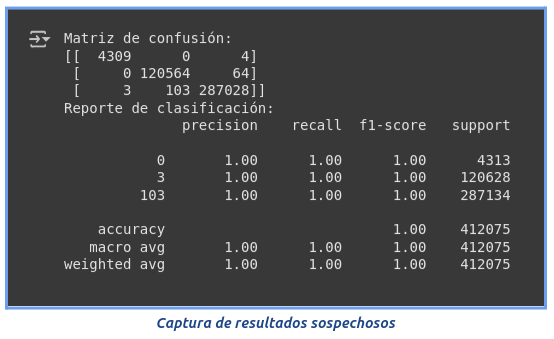

Estos valores indicaban una precisi√≥n perfecta (1.00 en todas las m√©tricas), lo que llev√≥ a sospechar que el modelo podr√≠a estar sobreajustado.

**Ajuste del Modelo**

Para abordar esta situaci√≥n, se ajustaron los hiperpar√°metros del modelo con el objetivo de reducir su complejidad y mejorar su generalizaci√≥n. Se realizaron los siguientes cambios:

* Reducci√≥n de la profundidad m√°xima de los √°rboles: Se estableci√≥ max_depth=10 para limitar la complejidad de cada √°rbol.
* Menor cantidad de √°rboles: Se redujo n_estimators=50 para evitar un ajuste excesivo a los datos de entrenamiento.
* Ajuste en la divisi√≥n m√≠nima de nodos: Se evaluaron valores de min_samples_split y min_samples_leaf para regularizar a√∫n m√°s el modelo.

Con estos ajustes, se espera obtener un modelo m√°s robusto, evitando la memorizaci√≥n de datos y mejorando su capacidad de generalizaci√≥n en datos no vistos.

Por otra parte, ajustar el par√°metro max_depth tambi√©n tiene un impacto positivo en el rendimiento del sistema donde se ejecuta el modelo.
Al limitar la profundidad m√°xima de los √°rboles, se evita que el modelo crezca innecesariamente, reduciendo el consumo de memoria y mejorando la eficiencia del procesamiento.

Un n√∫mero excesivo de √°rboles puede aumentar el costo computacional sin aportar mejoras significativas en la predicci√≥n.
Ajustando estos par√°metros, el modelo no solo reduce el riesgo de sobreajuste, sino que tambi√©n optimiza los recursos, permitiendo una ejecuci√≥n m√°s eficiente en t√©rminos de memoria y velocidad.

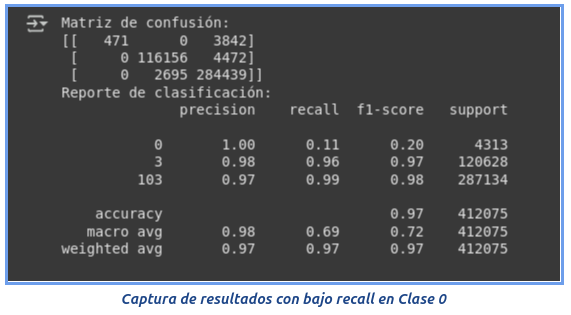

De esta manera, estos nuevos resultados indican que el ajuste de los par√°metros ha reducido el sobreajuste, ya que las m√©tricas ya no son perfectas (1.00 en todas las clases). Sin embargo, ahora se observa un problema con la clase 0, que tiene un recall muy bajo (0.11). Esto  significa que el modelo est√° clasificando incorrectamente la mayor√≠a de los ejemplos de esta clase como otra clase (principalmente 103). Esto puede deberse a que la clase 0 est√° subrepresentada o a que el modelo no tiene suficiente informaci√≥n para distinguirla correctamente.

Se va a ajustar el modelo usando el par√°metro class_weight='balanced', que dar√° m√°s peso a las clases menos representadas (en este caso, la clase 0) durante el entrenamiento. Esto deber√≠a ayudar al modelo a mejorar el recall de la clase 0, especialmente si est√° desbalanceada.

Adem√°s, se fueron ajustando los demas par√°metros para mejorar el rendimiento y controlar la complejidad del modelo.

Para n_estimators se establecio nuevamente el n√∫mero de √°rboles en 100 para asegurar que el modelo tenga suficiente capacidad de predicci√≥n sin sobreajustarse, ya que para 2 millones de registros es necesario que el numero de arboles sea alto.

La variable con la que mas se itero fue max_depth. Se prob√≥ con valores de 10, 15 y finalmente se dejo en 12, lo que ayud√≥ a prevenir el sobreajuste, permitiendo que los √°rboles no crezcan demasiado y se ajusten a ruido o patrones espec√≠ficos de los datos de entrenamiento.

Estos ajustes permitieron al modelo ser m√°s efectivo y equilibrado al tratar con datos desbalanceados y evitar problemas de sobreajuste, mientras mejoran el rendimiento global.

Por otra parte, se realiz√≥ una validaci√≥n cruzada para evaluar el desempe√±o del modelo y comprobar de igual manera si est√° sobreajustado. La validaci√≥n cruzada es una t√©cnica que divide el conjunto de entrenamiento en varias partes ("folds") y entrena el modelo en algunos de ellos mientras lo eval√∫a en los restantes.

En este caso, se utiliza validaci√≥n cruzada con 5 folds (cv=5), lo que significa que el modelo se entrena en el 80% de los datos y se eval√∫a en el 20% restante, repitiendo este proceso cinco veces con diferentes combinaciones de datos. Esto permite obtener una estimaci√≥n m√°s confiable del rendimiento del modelo en datos no vistos, evitando depender √∫nicamente del conjunto de prueba.

El objetivo principal de esta validaci√≥n es detectar si el modelo est√° sobreajustado. Si el rendimiento en la validaci√≥n cruzada es significativamente menor que en el conjunto de prueba, es probable que el modelo se haya ajustado demasiado a los datos de entrenamiento y no generalice bien a datos nuevos.

Para realizar la validaci√≥n cruzada, se usa el siguiente c√≥digo:

In [49]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100, max_depth=12, random_state=42, min_samples_split=10, min_samples_leaf=5, class_weight='balanced')
scores = cross_val_score(rf, X_train, y_train, cv=5)
print("Validaci√≥n cruzada, precisi√≥n promedio:", scores.mean())


Validaci√≥n cruzada, precisi√≥n promedio: 0.9939628561212359


El resultado obtenido fue una precisi√≥n promedio del 99.4% en validaci√≥n cruzada, lo que indica que el modelo generaliza bien en diferentes subconjuntos de datos. Para analizarlo en el contexto del sobreajuste, se compar√≥ con la precisi√≥n obtenida en el conjunto de prueba. Dado que la precisi√≥n en validaci√≥n cruzada sigue siendo muy alta (~99.4%), el modelo parece estar generalizando bien.

# Conclusion final

En este an√°lisis, se llev√≥ a cabo la predicci√≥n de la formaci√≥n de hidratos en funci√≥n de variables de presi√≥n y temperatura utilizando t√©cnicas de aprendizaje supervisado.
Para ello, se realiz√≥ un exhaustivo preprocesamiento de los datos, que incluy√≥ la integraci√≥n de m√∫ltiples archivos CSV en un √∫nico DataFrame, la conversi√≥n de unidades, la eliminaci√≥n de valores nulos y la transformaci√≥n de la variable objetivo (class) a formato num√©rico.

El proceso de selecci√≥n de caracter√≠sticas fue fundamental para mejorar la eficiencia y precisi√≥n del modelo. Se emplearon dos enfoques:

* Correlaci√≥n de Spearman: Permiti√≥ evaluar la relaci√≥n entre las variables y la presencia de hidratos. Aunque algunas variables mostraron correlaciones bajas, se decidi√≥ retener aquellas con valores comparables o superiores a las variables ya identificadas como relevantes en estudios previos.
* Information Gain: Se utiliz√≥ para medir la importancia de cada variable en la predicci√≥n del target, permitiendo descartar la variable P-MON-CKP, que mostr√≥ menor relevancia en comparaci√≥n con las dem√°s.

El an√°lisis de normalidad mediante pruebas estad√≠sticas (D‚ÄôAgostino-Pearson y Kolmogorov-Smirnov) confirm√≥ que las variables no siguen una distribuci√≥n normal, lo que influy√≥ en la elecci√≥n de modelos m√°s robustos frente a distribuciones no gaussianas.

Finalmente, el modelo seleccionado y entrenado alcanz√≥ una precisi√≥n promedio del 99.39% en validaci√≥n cruzada, lo que indica un desempe√±o excepcional en la predicci√≥n de la formaci√≥n de hidratos. Este resultado sugiere que las variables seleccionadas capturan eficazmente los patrones que determinan la formaci√≥n de hidratos en los pozos analizados.

En futuras mejoras, se podr√≠a considerar la inclusi√≥n de t√©cnicas adicionales de manejo de desequilibrios en la variable objetivo y la evaluaci√≥n de modelos m√°s complejos para verificar si pueden ofrecer mejoras adicionales en el rendimiento.